In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pywt
import warnings
warnings.filterwarnings("ignore")

In [2]:
CE = pd.read_csv('CE.txt', delimiter='\t', header=None)
CP = pd.read_csv('CP.txt', delimiter='\t', header=None)

EPS1 = pd.read_csv('EPS1.txt', delimiter='\t', header=None)

FS1 = pd.read_csv('FS1.txt', delimiter='\t', header=None)
FS2 = pd.read_csv('FS2.txt', delimiter='\t', header=None)

PS1 = pd.read_csv('PS1.txt', delimiter='\t', header=None)
PS2 = pd.read_csv('PS2.txt', delimiter='\t', header=None)
PS3 = pd.read_csv('PS3.txt', delimiter='\t', header=None)
PS4 = pd.read_csv('PS4.txt', delimiter='\t', header=None)
PS5 = pd.read_csv('PS5.txt', delimiter='\t', header=None)
PS6 = pd.read_csv('PS6.txt', delimiter='\t', header=None)

SE = pd.read_csv('SE.txt', delimiter='\t', header=None)

TS1 = pd.read_csv('TS1.txt', delimiter='\t', header=None)
TS2 = pd.read_csv('TS2.txt', delimiter='\t', header=None)
TS3 = pd.read_csv('TS3.txt', delimiter='\t', header=None)
TS4 = pd.read_csv('TS4.txt', delimiter='\t', header=None)

VS1 = pd.read_csv('VS1.txt', delimiter='\t', header=None)

In [3]:
labels = {0:'Cooler condition', 1:'Valve Condition', 2:'Internal pump leakage', 3:'Hydraulic accumulator / bar', 4:'stable flag'}
Y = pd.read_csv('profile.txt', delimiter='\t', header=None).rename(columns=labels)
Y.index.name = 'Cycle ID'

In [4]:
def downsample(df, rate):
    return df.T[::rate].reset_index().T

In [5]:
PS1_d, PS2_d, PS3_d, PS4_d, PS5_d, PS6_d, EPS1_d = [downsample(PS, 100) for PS in [PS1, PS2, PS3, PS4, PS5, PS6, EPS1]]
FS1_d, FS2_d = [downsample(FS, 10) for FS in [FS1, FS2]]

In [6]:
def add_index(df, name):
    df = pd.concat([df.reset_index()], keys=[name], names=['Sensor', 'Cycle ID'])
    return df[1:]

In [7]:
dfs = [PS1_d, PS2_d, PS3_d, PS4_d, PS5_d, PS6_d, EPS1_d, FS1_d, FS2_d, CE, CP, SE, TS1, TS2, TS3, TS4, VS1]
names = ['PS1_d', 'PS2_d', 'PS3_d', 'PS4_d', 'PS5_d', 'PS6_d', 'EPS1_d', 'FS1_d', 'FS2_d', 'CE', 'CP', 'SE', 'TS1', 'TS2', 'TS3', 'TS4', 'VS1']

PS1_d, PS2_d, PS3_d, PS4_d, PS5_d, PS6_d, EPS1_d, FS1_d, FS2_d, CE, CP, SE, TS1, TS2, TS3, TS4, VS1 = [add_index(x, y).drop(columns=['index']) for x, y in zip(dfs, names)]

In [8]:
X = pd.concat(dfs, keys=names, names=['Sensor Name', 'Cycle ID'])[1::]

In [9]:
full_df = X.join(Y, how='inner')

In [10]:
mask, idx = full_df.index.get_loc_level(2004, level='Cycle ID')
full_df.loc[mask]

,,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,Cooler condition,Valve Condition,Internal pump leakage,Hydraulic accumulator / bar,stable flag
Sensor Name,Cycle ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PS1_d,2004,150.920,191.160,191.220,191.240,191.090,191.240,191.190,191.190,191.150,191.270,152.880,146.510,146.340,146.390,146.180,146.270,146.190,146.230,146.220,146.160,155.910,155.770,155.930,155.820,155.710,155.810,155.730,155.850,155.790,155.720,165.980,165.570,165.490,165.560,165.510,165.440,165.480,165.590,165.430,165.480,155.910,155.850,155.810,155.840,155.880,155.880,155.810,155.660,155.800,155.730,151.440,151.110,151.170,151.190,151.010,151.090,151.080,151.020,150.890,151.080,100,90,1,100,0
PS2_d,2004,125.010,0.094,0.008,0.000,0.000,0.000,0.000,0.000,0.000,0.000,124.720,120.480,120.260,120.490,120.200,120.260,120.410,120.240,120.380,120.180,129.980,130.070,130.080,129.840,129.890,129.980,129.940,129.970,129.920,129.810,140.000,139.860,139.660,139.790,139.580,139.730,139.660,139.720,139.770,139.900,130.020,130.000,130.020,129.980,129.780,130.020,129.990,129.860,130.130,129.940,125.600,125.220,125.210,125.130,125.240,125.110,125.100,125.160,125.080,124.880,100,90,1,100,0
PS3_d,2004,2.320,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.477,2.352,2.391,2.266,2.305,2.430,2.227,2.406,2.266,2.281,2.320,2.328,2.227,2.375,2.305,2.266,2.242,2.281,2.273,2.281,2.242,2.305,2.273,2.297,2.328,2.211,2.266,2.273,2.086,2.172,2.297,2.375,2.195,2.273,2.336,2.227,2.227,2.320,2.281,2.250,2.375,2.320,2.187,2.320,2.242,2.336,2.320,2.328,2.211,2.328,100,90,1,100,0
PS4_d,2004,10.033,10.095,10.066,10.020,10.095,10.101,10.040,10.057,10.095,10.020,10.020,10.079,10.027,9.998,10.062,10.054,10.018,10.079,10.089,10.029,10.068,10.092,10.038,10.048,10.106,10.044,10.043,10.089,10.066,10.052,10.079,10.079,10.043,10.070,10.075,10.054,10.040,10.080,10.083,10.054,10.076,10.092,10.059,10.068,10.088,10.064,10.035,10.105,10.066,10.041,10.070,10.080,10.031,10.062,10.087,10.038,10.059,10.098,10.059,10.049,100,90,1,100,0
PS5_d,2004,9.814,9.859,9.842,9.808,9.857,9.871,9.828,9.833,9.854,9.792,9.805,9.837,9.795,9.783,9.825,9.830,9.800,9.839,9.841,9.801,9.830,9.862,9.820,9.835,9.856,9.823,9.807,9.851,9.849,9.818,9.848,9.855,9.814,9.833,9.852,9.823,9.807,9.857,9.842,9.816,9.861,9.852,9.816,9.842,9.861,9.825,9.823,9.873,9.828,9.819,9.859,9.837,9.809,9.846,9.859,9.811,9.840,9.866,9.814,9.819,100,90,1,100,0
PS6_d,2004,9.697,9.738,9.720,9.696,9.743,9.753,9.717,9.714,9.738,9.674,9.689,9.715,9.677,9.670,9.710,9.708,9.681,9.717,9.722,9.682,9.717,9.755,9.704,9.705,9.735,9.718,9.684,9.731,9.728,9.698,9.725,9.746,9.694,9.714,9.738,9.707,9.691,9.748,9.724,9.703,9.747,9.741,9.705,9.726,9.741,9.705,9.708,9.753,9.710,9.710,9.736,9.726,9.694,9.731,9.741,9.705,9.719,9.738,9.700,9.705,100,90,1,100,0
EPS1_d,2004,2417.800,2928.800,2955.600,2955.800,2955.800,2955.800,2957.600,2956.000,2959.600,2958.000,2599.800,2360.000,2352.000,2352.000,2352.000,2353.600,2350.000,2351.600,2349.600,2353.600,2483.600,2485.600,2482.000,2485.600,2482.000,2483.800,2485.600,2482.000,2482.000,2485.400,2623.400,2621.800,2620.000,2619.800,2619.800,2619.800,2619.800,2619.600,2619.600,2617.800,2489.800,2485.800,2484.000,2485.600,2483.800,2485.600,2485.600,2483.600,2483.600,2485.600,2424.000,2421.800,2421.600,2417.800,2419.600,2417.800,2419.600,2419.600,2417.800,2417.800,100,90,1,100,0
FS1_d,2004,8.375,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.004,10.874,7.658,7.732,7.818,7.621,7.809,7.511,7.690,7.624,5.337,7.831,7.787,7.849,7.624,7.581,7.553,7.708,7.776,7.789,6.126,7.586,7.533,7.615,7.446,7.656,7.444,7.626,7.424,7.678,8.604,7.644,7.739,7.513,7.523,7.523,7.493,7.569,7.476,7.475,8.286,7.893,7.488,7.713,7.825,7.431,7.624,7.739,7.481,7.654,7.762,100,90,1,100,0
FS2_d,2004,10.149,10.141,10.137,10.143,10.142,10.133,10.145,10.142,10.122,10.136,10.130,10.102,1

In [11]:
full_df.to_csv('full_df.csv') 

In [12]:
full_df = full_df.swaplevel()
labels = ['Cooler condition', 'Valve Condition', 'Internal pump leakage',
           'Hydraulic accumulator / bar', 'stable flag']
X = full_df.drop(columns=labels)
y = full_df[labels]
X = X.sort_index().T.stack(level=['Cycle ID']).swaplevel()
full_df = pd.merge(X, y, left_on='Cycle ID', right_on='Cycle ID').drop_duplicates(keep='first')
X = full_df.drop(columns=labels)
y = full_df[labels]
full_df.to_csv('continuous_data.csv')

In [13]:
full_df

,CE,CP,EPS1_d,FS1_d,FS2_d,PS1_d,PS2_d,PS3_d,PS4_d,PS5_d,PS6_d,SE,TS1,TS2,TS3,TS4,VS1,Cooler condition,Valve Condition,Internal pump leakage,Hydraulic accumulator / bar,stable flag
Cycle ID,,,,,,,,,,,,,,,,,,,,,,
0,47.202,2.184,2411.6,8.990,10.179,151.47,125.500,2.305,0.000,9.936,9.818,68.039,35.570,40.961,38.320,30.363,0.604,3,100,0,130,1
0,47.273,2.184,2936.6,0.001,10.176,191.46,0.430,0.000,0.000,9.974,9.846,0.000,35.492,40.949,38.332,30.375,0.605,3,100,0,130,1
0,47.250,2.184,2656.2,0.005,10.163,179.09,0.133,0.000,0.000,9.984,9.865,0.000,35.469,40.965,38.320,30.367,0.611,3,100,0,130,1
0,47.332,2.185,2949.4,0.000,10.167,191.43,0.000,0.000,0.000,9.947,9.823,0.000,35.422,40.922,38.324,30.367,0.603,3,100,0,130,1
0,47.213,2.178,2945.8,0.000,10.167,191.36,0.000,0.000,0.000,9.964,9.847,0.000,35.414,40.879,38.332,30.379,0.608,3,100,0,130,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2204,46.355,2.134,2417.4,7.706,10.171,151.73,125.740,2.273,10.222,10.000,9.877,68.167,35.441,40.910,38.195,30.395,0.516,100,100,0,90,0
2204,46.432,2.146,2415.6,7.858,10.196,151.84,125.500,2.352,10.207,9.962,9.846,68.167,35.437,40.895,38.184,30.391,0.528,100,100,0,90,0
2204,46.384,2.144,2417.4,8.013,10.194,151.81,125.780,2.305,10.198,9.965,9.851,68.258,35.434,40.883,38.184,30.395,0.522,100,100,0,90,0


In [14]:
full_df = pd.read_csv('full_df.csv', index_col=[0,1])

In [15]:
full_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,Cooler condition,Valve Condition,Internal pump leakage,Hydraulic accumulator / bar,stable flag
count,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.00000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.00000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000,37485.000000
mean,172.932035,192.875929,196.025099,196.110471,196.102371,196.044390,196.042953,196.049555,196.046548,199.41870,185.234945,168.733781,168.294733,168.258417,168.232796,168.160836,168.150272,168.131610,168.129785,167.145266,178.582807,180.405510,180.396390,180.450506,180.445973,180.389109,180.384577,180.380467,180.371014,179.631945,188.090274,188.756905,188.741260,188.776481,188.776463,188.711104,188.703618,188.701932,188.698047,189.290548,181.302375,180.606760,180.586092,180.620511,180.613790,180.545765,180.539109,180.531626,180.533299,181.297783,173.755287,173.00434,172.955601,172.986538,172.972336,172.903084,172.892930,172.888615,172.888431,172.890211,41.240816,90.693878,0.669388,107.199546,0.342857
std,544.080575,663.471954,675.918080,676.287581,676.273431,676.065348,676.079500,676.127960,676.145227,675.33944,594.645202,529.755835,528.100272,528.083136,527.964888,527.667191,527.601633,527.519465,527.494555,527.688576,566.523310,571.903367,571.873237,572.114053,572.116189,571.914920,571.912426,571.906851,571.879965,572.025410,600.416127,600.445089,600.401251,600.566603,600.582656,600.329167,600.312994,600.303416,600.284340,600.139196,573.328680,572.814203,572.734904,572.909054,572.897505,572.639189,572.627606,572.611533,572.624757,572.428328,545.706265,544.48010,544.304421,544.473334,544.424065,544.159750,544.124178,544.114948,544.111535,544.093870,42.374097,10.679522,0.817058,16.432340,0.474671
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,73.000000,0.000000,90.000000,0.000000
25%,8.274000,0.117000,0.003000,0.003000,0.003000,0.003000,0.003000,0.003000,0.003000,0.68700,8.482000,7.890000,7.779000,7.763000,7.755000,7.752000,7.746000,7.747000,7.743000,5.192000,7.693000,7.678000,7.680000,7.678000,7.673000,7.673000,7.680000,7.676000,7.678000,5.049000,7.601000,7.617000,7.620000,7.619000,7.619000,7.621000,7.618000,7.628000,7.623000,8.465000,7.731000,7.695000,7.693000,7.682000,7.678000,7.682000,7.678000,7.674000,7.678000,8.405000,7.773000,7.73100,7.716000,7.714000,7.713000,7.713000,7.718000,7.708000,7.709000,7.709000,3.000000,80.000000,0.000000,90.000000,0.000000
50%,27.300000,9.626000,9.623000,9.615000,9.617000,9.626000,9.622000,9.624000,9.617000,10.05300,27.369000,27.435000,27.452000,27.512000,27.561000,27.582000,27.609000,27.644000,27.731000,26.852000,26.901000,26.917000,26.930000,26.888000,26.846000,26.754000,26.692000,26.685000,26.679000,

In [16]:
means = full_df.groupby('Sensor Name').mean().T[:60]
stds = full_df.groupby('Sensor Name').std().T[:60]

In [17]:
print(means.keys())

Index(['CE', 'CP', 'EPS1_d', 'FS1_d', 'FS2_d', 'PS1_d', 'PS2_d', 'PS3_d',
       'PS4_d', 'PS5_d', 'PS6_d', 'SE', 'TS1', 'TS2', 'TS3', 'TS4', 'VS1'],
      dtype='object', name='Sensor Name')


In [18]:
def plot_keys(means, stds, keys, ylabel):
    fig = plt.figure(figsize=(16,9))
    for key in keys:
        plt.plot(means.index.values, means[key], label=key)
    plt.legend()
    plt.ylabel(ylabel)
    plt.xlabel('Time of Cycle /s')

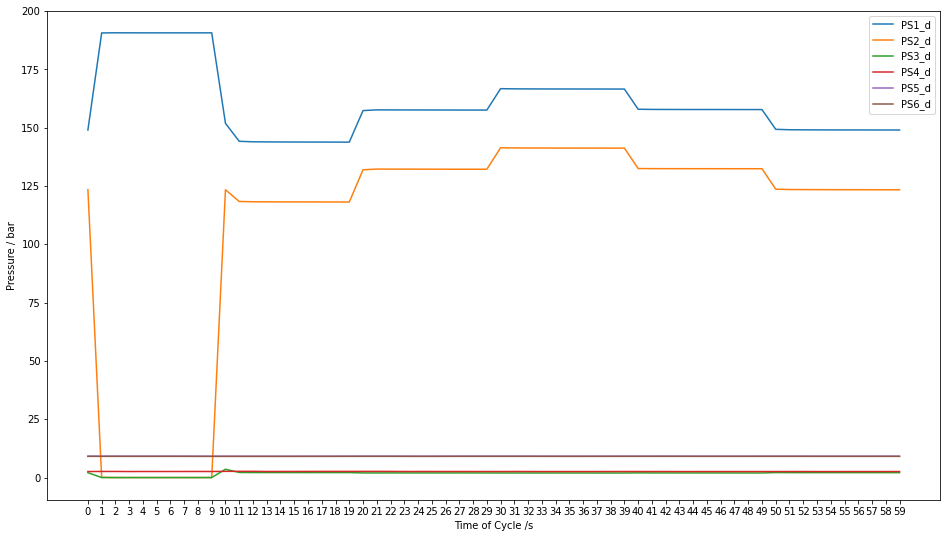

In [19]:
plot_keys(means, stds, 
          ['PS1_d', 'PS2_d', 'PS3_d', 'PS4_d', 'PS5_d', 'PS6_d'],
          'Pressure / bar'
          )

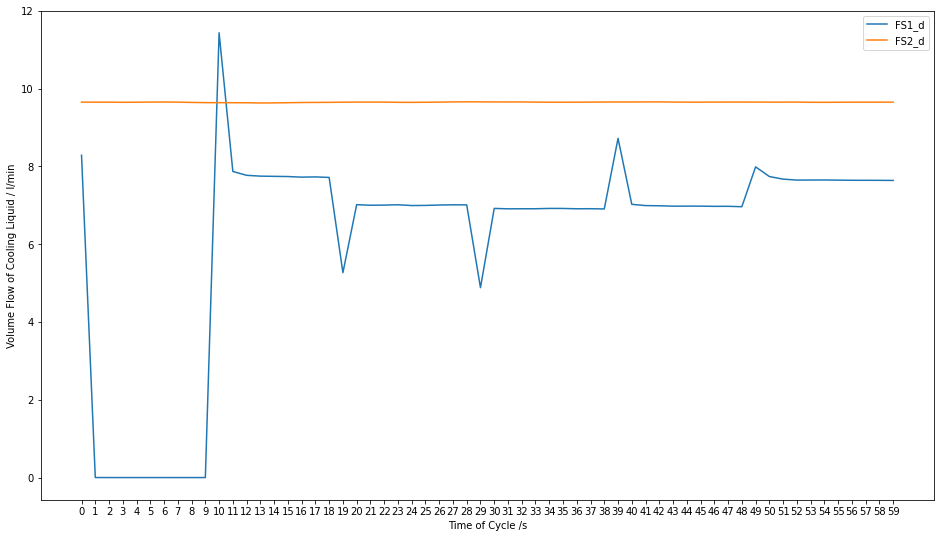

In [20]:
plot_keys(means, stds,
         ['FS1_d', 'FS2_d'],
         'Volume Flow of Cooling Liquid / l/min'
         )

In [21]:
X=full_df.drop(['Cooler condition', 'Valve Condition', 'Internal pump leakage', 'Hydraulic accumulator / bar', 'stable flag'],1)
y=full_df['stable flag']

0     0.157424
1     0.121015
2     0.127962
3     0.131915
4     0.126989
5     0.125613
6     0.128362
7     0.127378
8     0.124963
9     0.121555
10    0.175838
11    0.165247
12    0.169135
13    0.170211
14    0.172653
15    0.169472
16    0.173717
17    0.170167
18    0.174951
19    0.152560
20    0.163020
21    0.179070
22    0.175718
23    0.172356
24    0.173822
25    0.177720
26    0.176902
27    0.181082
28    0.179938
29    0.155241
30    0.160049
31    0.176667
32    0.178206
33    0.171504
34    0.174369
35    0.175615
36    0.175908
37    0.175950
38    0.175125
39    0.154561
40    0.170294
41    0.173736
42    0.176406
43    0.173862
44    0.175200
45    0.177476
46    0.178003
47    0.178940
48    0.173399
49    0.163107
50    0.162544
51    0.169263
52    0.174289
53    0.170120
54    0.170619
55    0.171042
56    0.177436
57    0.177070
58    0.178675
59    0.172325
dtype: float64


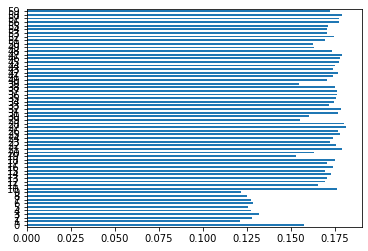

In [22]:
from sklearn.feature_selection import mutual_info_classif
importances=mutual_info_classif(X,y)
feat_imp=pd.Series(importances, X.columns[0:len(X.columns)])
print(feat_imp)
feat_imp.plot(kind='barh') 
plt.show()

In [23]:
X=full_df.drop(['Cooler condition', 'Valve Condition', 'Internal pump leakage', 'Hydraulic accumulator / bar', 'stable flag'],1)
y=full_df['Valve Condition']

0     0.108628
1     0.090778
2     0.089330
3     0.096400
4     0.092948
5     0.095482
6     0.093079
7     0.097592
8     0.094146
9     0.116196
10    0.314621
11    0.127992
12    0.120668
13    0.122735
14    0.124473
15    0.118054
16    0.119725
17    0.117902
18    0.123957
19    0.105490
20    0.116564
21    0.121357
22    0.117867
23    0.121510
24    0.120403
25    0.120865
26    0.117575
27    0.129745
28    0.123663
29    0.109272
30    0.110905
31    0.119001
32    0.126037
33    0.115824
34    0.114810
35    0.117740
36    0.123876
37    0.125184
38    0.122618
39    0.109826
40    0.119384
41    0.116670
42    0.125757
43    0.120356
44    0.117744
45    0.120981
46    0.118509
47    0.122644
48    0.123196
49    0.116564
50    0.113853
51    0.116543
52    0.116359
53    0.114894
54    0.118294
55    0.117200
56    0.116010
57    0.118394
58    0.115239
59    0.116543
dtype: float64


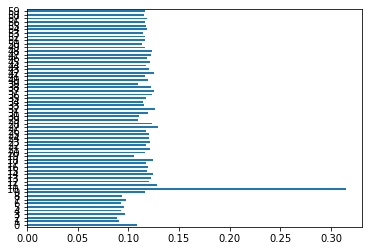

In [24]:
from sklearn.feature_selection import mutual_info_classif
importances=mutual_info_classif(X,y)
feat_imp=pd.Series(importances, X.columns[0:len(X.columns)])
print(feat_imp)
feat_imp.plot(kind='barh')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc4daf6e50>,
      dtype=object)

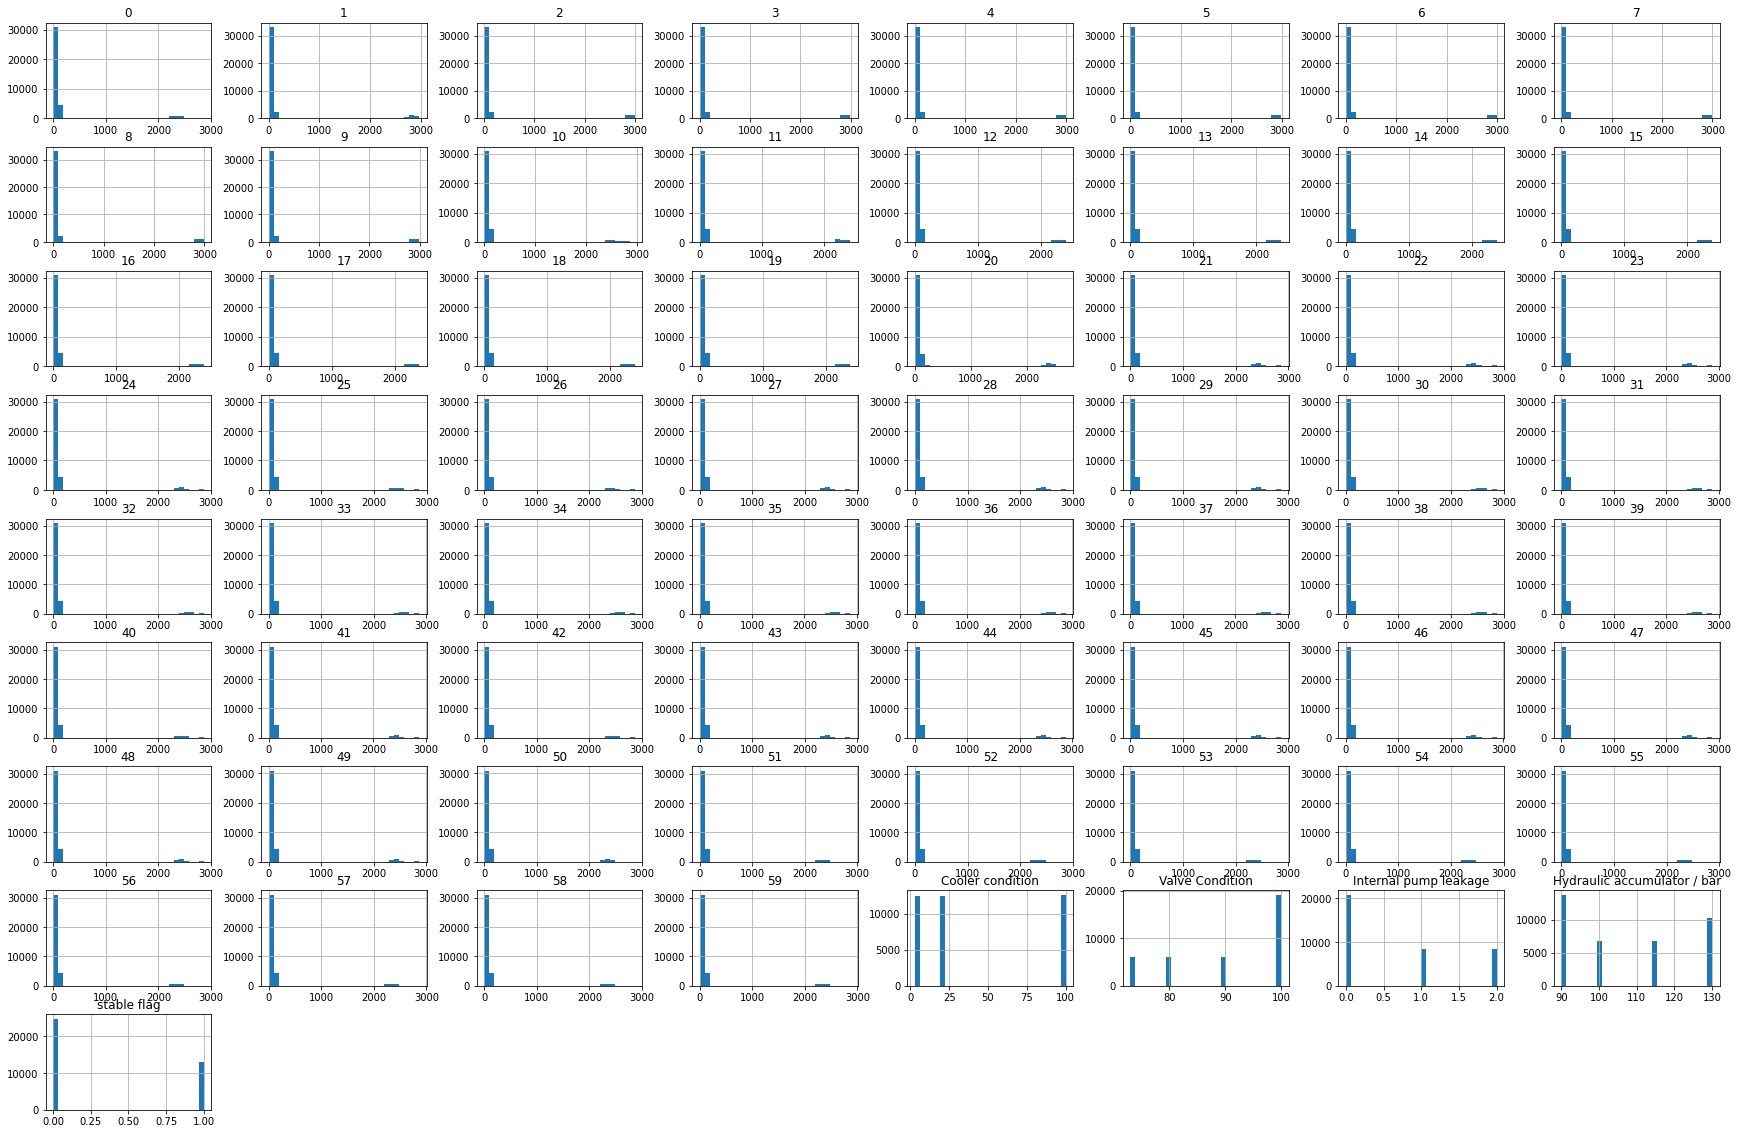

In [25]:
full_df.hist(bins=30, figsize=(30, 20))

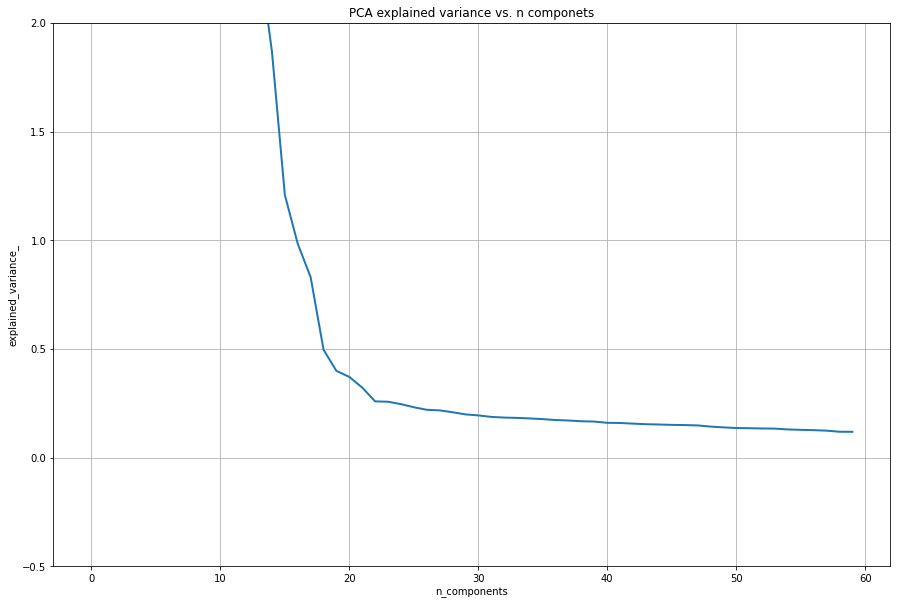

In [26]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)
plt.figure(figsize=(15, 10))
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')
plt.ylim(-0.5, 2)
plt.title('PCA explained variance vs. n componets')
path = str('fig\\explained variance.png')

plt.grid(True)
plt.savefig(path, dpi=400)

(37485, 60)
(37485, 2)


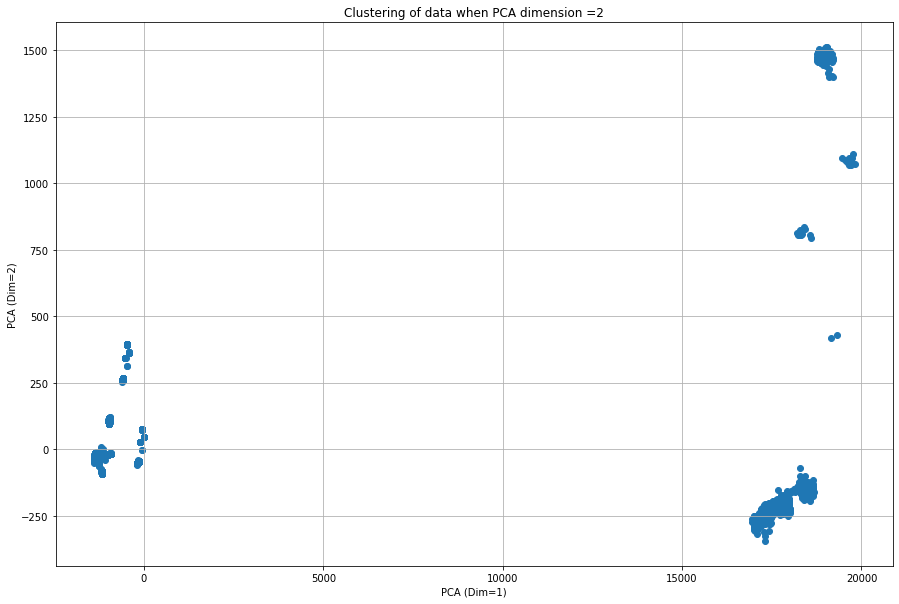

In [27]:
pca_2 = PCA(2)
projected = pca_2.fit_transform(X)
print(X.shape)
print(projected.shape)
plt.figure(figsize=(15, 10))
plt.scatter(projected[:, 0], projected[:, 1])
plt.xlabel('PCA (Dim=1)')
plt.ylabel('PCA (Dim=2)')
plt.title('Clustering of data when PCA dimension =2')
path = str('fig\\clustering of pca.png')

plt.grid(True)
plt.savefig(path, dpi=400)

In [28]:
full_df

0  ...  stable flag
Sensor Name Cycle ID           ...             
PS1_d       0         151.470  ...            1
            1         151.110  ...            1
            2         150.810  ...            1
            3         150.480  ...            1
            4         150.410  ...            1
...                       ...  ...          ...
VS1         2200        0.558  ...            0
            2201        0.566  ...            0
            2202        0.566  ...            0
            2203        0.529  ...            0
            2204        0.541  ...            0

[37485 rows x 65 columns]

In [29]:
full_df = full_df.swaplevel()
labels = ['Cooler condition', 'Valve Condition', 'Internal pump leakage',
           'Hydraulic accumulator / bar', 'stable flag']
X = full_df.drop(columns=labels)
y = full_df[labels]
X = X.sort_index().T.stack(level=['Cycle ID']).swaplevel()
full_df = pd.merge(X, y, left_on='Cycle ID', right_on='Cycle ID').drop_duplicates(keep='first')
X = full_df.drop(columns=labels)
y = full_df[labels]

In [30]:
full_df

,CE,CP,EPS1_d,FS1_d,FS2_d,PS1_d,PS2_d,PS3_d,PS4_d,PS5_d,PS6_d,SE,TS1,TS2,TS3,TS4,VS1,Cooler condition,Valve Condition,Internal pump leakage,Hydraulic accumulator / bar,stable flag
Cycle ID,,,,,,,,,,,,,,,,,,,,,,
0,47.202,2.184,2411.6,8.990,10.179,151.47,125.500,2.305,0.000,9.936,9.818,68.039,35.570,40.961,38.320,30.363,0.604,3,100,0,130,1
0,47.273,2.184,2936.6,0.001,10.176,191.46,0.430,0.000,0.000,9.974,9.846,0.000,35.492,40.949,38.332,30.375,0.605,3,100,0,130,1
0,47.250,2.184,2656.2,0.005,10.163,179.09,0.133,0.000,0.000,9.984,9.865,0.000,35.469,40.965,38.320,30.367,0.611,3,100,0,130,1
0,47.332,2.185,2949.4,0.000,10.167,191.43,0.000,0.000,0.000,9.947,9.823,0.000,35.422,40.922,38.324,30.367,0.603,3,100,0,130,1
0,47.213,2.178,2945.8,0.000,10.167,191.36,0.000,0.000,0.000,9.964,9.847,0.000,35.414,40.879,38.332,30.379,0.608,3,100,0,130,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2204,46.355,2.134,2417.4,7.706,10.171,151.73,125.740,2.273,10.222,10.000,9.877,68.167,35.441,40.910,38.195,30.395,0.516,100,100,0,90,0
2204,46.432,2.146,2415.6,7.858,10.196,151.84,125.500,2.352,10.207,9.962,9.846,68.167,35.437,40.895,38.184,30.391,0.528,100,100,0,90,0
2204,46.384,2.144,2417.4,8.013,10.194,151.81,125.780,2.305,10.198,9.965,9.851,68.258,35.434,40.883,38.184,30.395,0.522,100,100,0,90,0


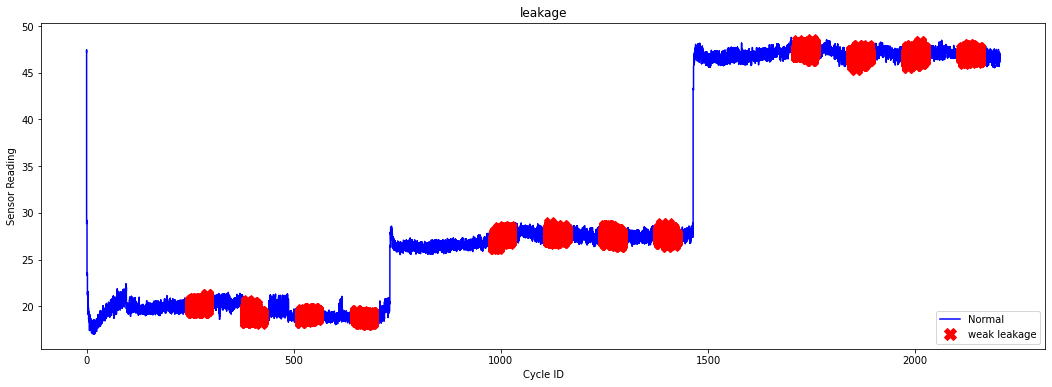

In [31]:
a =full_df[full_df['Internal pump leakage'] == 1] 
_ = plt.figure(figsize=(18,6))
_ = plt.plot(full_df['CE'], color='blue', label='Normal')
_ = plt.plot(a['CE'], linestyle='none', marker='X', color='red', markersize=12, label='weak leakage')
_ = plt.xlabel('Cycle ID')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('leakage')
_ = plt.legend(loc='best')
plt.show();

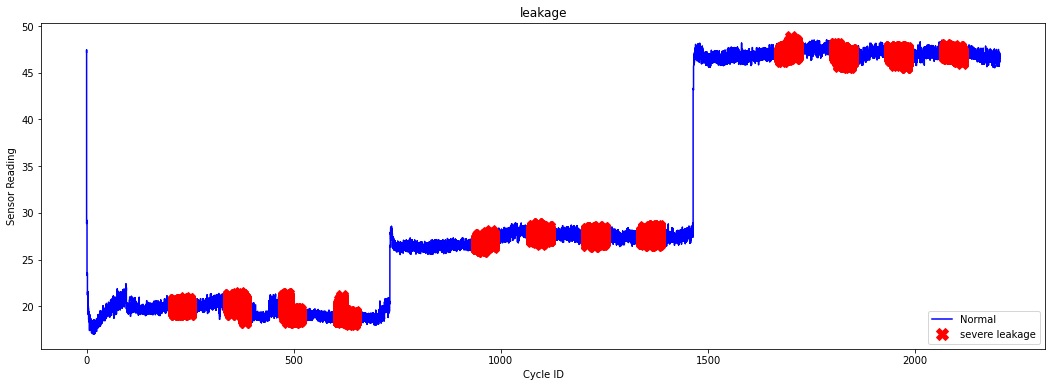

In [32]:
a =full_df[full_df['Internal pump leakage'] == 2] 
_ = plt.figure(figsize=(18,6))
_ = plt.plot(full_df['CE'], color='blue', label='Normal')
_ = plt.plot(a['CE'], linestyle='none', marker='X', color='red', markersize=12, label='severe leakage')
_ = plt.xlabel('Cycle ID')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('leakage')
_ = plt.legend(loc='best')
plt.show();

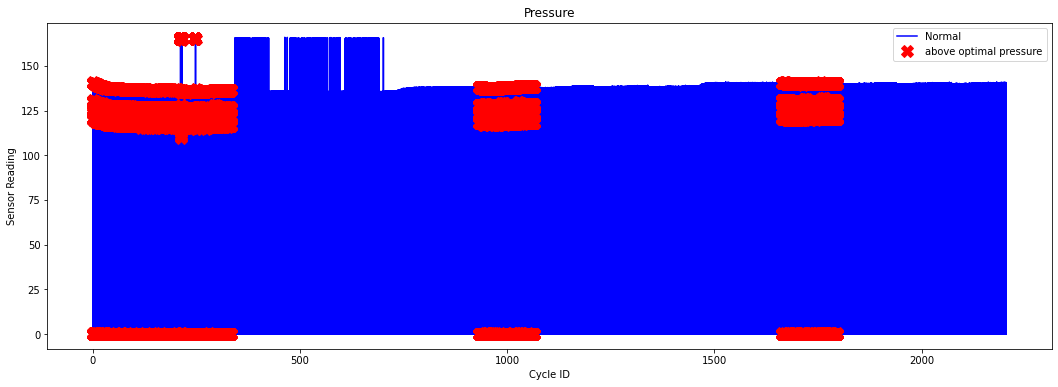

In [33]:
a =full_df[full_df['Hydraulic accumulator / bar'] == 130] 
_ = plt.figure(figsize=(18,6))
_ = plt.plot(full_df['PS2_d'], color='blue', label='Normal')
_ = plt.plot(a['PS2_d'], linestyle='none', marker='X', color='red', markersize=12, label='above optimal pressure')
_ = plt.xlabel('Cycle ID')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Pressure')
_ = plt.legend(loc='best')
plt.show();

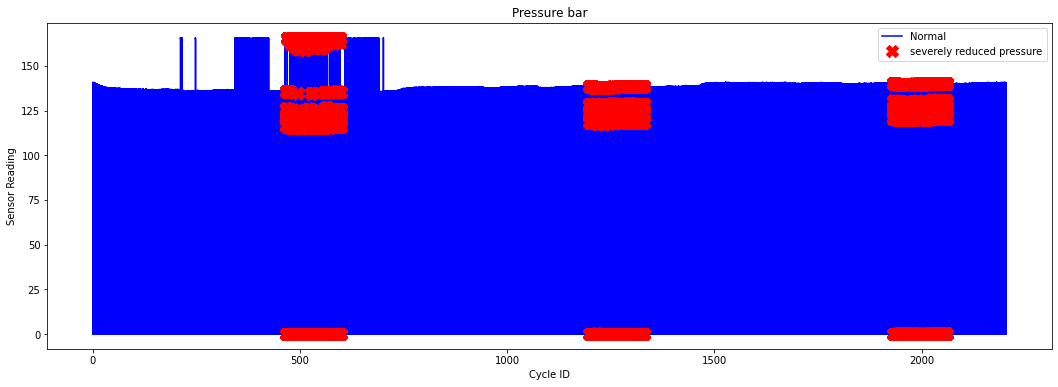

In [34]:
a =full_df[full_df['Hydraulic accumulator / bar'] == 100] 
_ = plt.figure(figsize=(18,6))
_ = plt.plot(full_df['PS2_d'], color='blue', label='Normal')
_ = plt.plot(a['PS2_d'], linestyle='none', marker='X', color='red', markersize=12, label='severely reduced pressure')
_ = plt.xlabel('Cycle ID')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Pressure bar')
_ = plt.legend(loc='best')
plt.show();

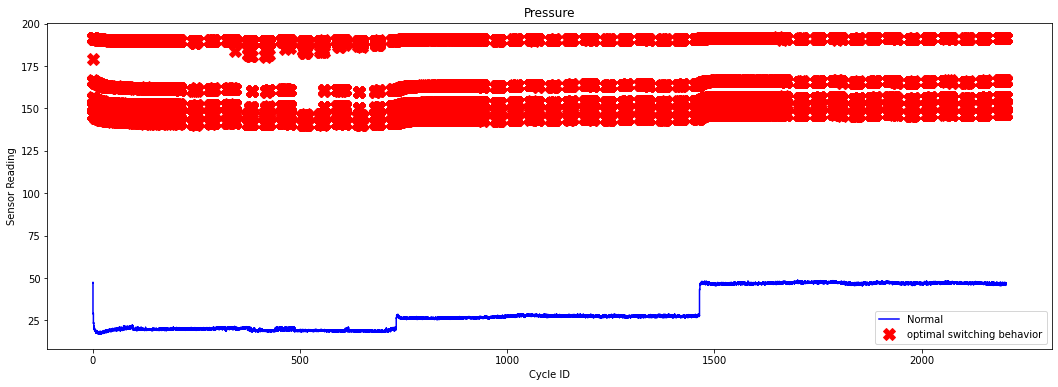

In [35]:
a =full_df[full_df['Valve Condition'] == 100] 
_ = plt.figure(figsize=(18,6))
_ = plt.plot(full_df['CE'], color='blue', label='Normal')
_ = plt.plot(a['PS1_d'], linestyle='none', marker='X', color='red', markersize=12, label='optimal switching behavior')
_ = plt.xlabel('Cycle ID')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Pressure')
_ = plt.legend(loc='best')
plt.show();

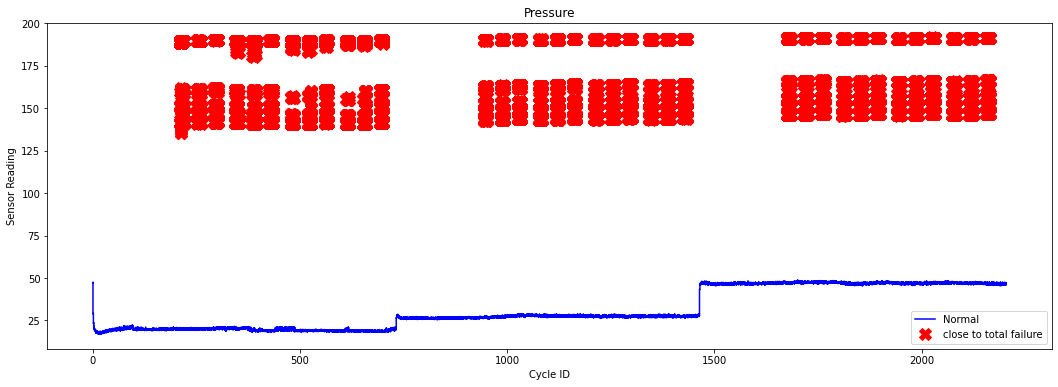

In [36]:
a =full_df[full_df['Valve Condition'] == 73] 
_ = plt.figure(figsize=(18,6))
_ = plt.plot(full_df['CE'], color='blue', label='Normal')
_ = plt.plot(a['PS1_d'], linestyle='none', marker='X', color='red', markersize=12, label='close to total failure')
_ = plt.xlabel('Cycle ID')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Pressure')
_ = plt.legend(loc='best')
plt.show();

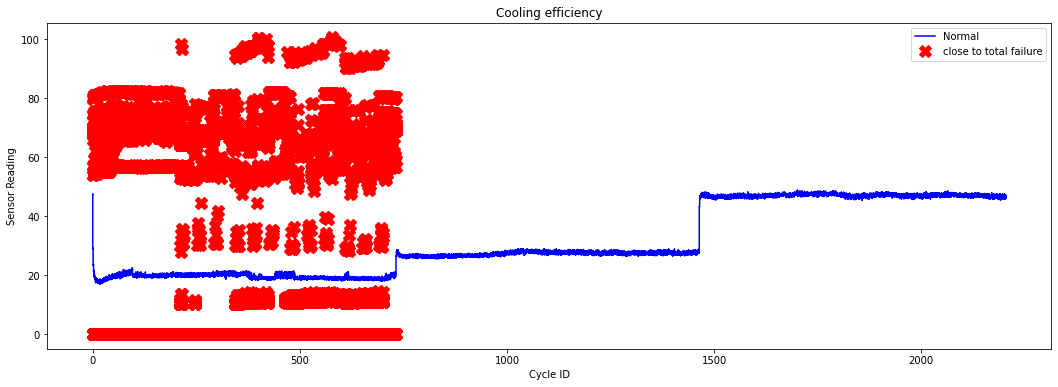

In [37]:
a =full_df[full_df['Cooler condition'] == 3] 
_ = plt.figure(figsize=(18,6))
_ = plt.plot(full_df['CE'], color='blue', label='Normal')
_ = plt.plot(a['SE'], linestyle='none', marker='X', color='red', markersize=12, label='close to total failure')
_ = plt.xlabel('Cycle ID')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Cooling efficiency')
_ = plt.legend(loc='best')
plt.show();

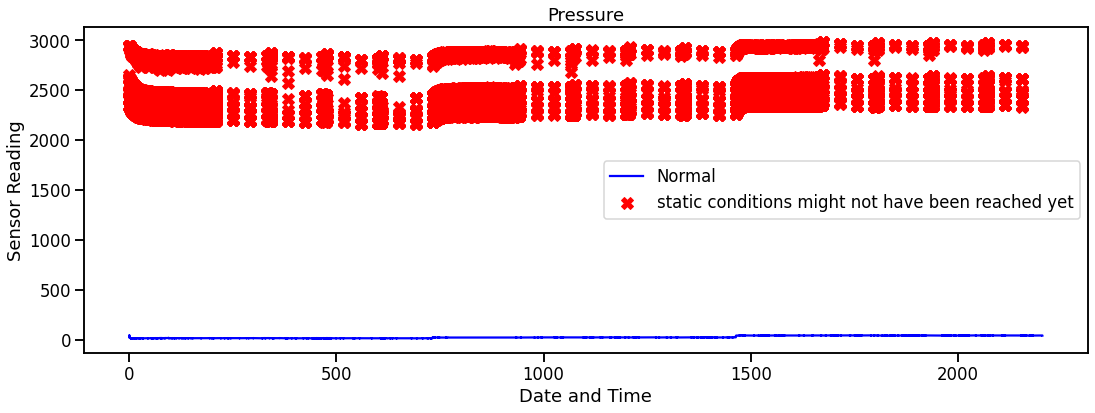

In [56]:
a =full_df[full_df['stable flag'] == 1] 
_ = plt.figure(figsize=(18,6))
_ = plt.plot(full_df['CE'], color='blue', label='Normal')
_ = plt.plot(a['EPS1_d'], linestyle='none', marker='X', color='red', markersize=12, label='static conditions might not have been reached yet')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('Sensor Reading')
_ = plt.title('Pressure')
_ = plt.legend(loc='best')
plt.show();

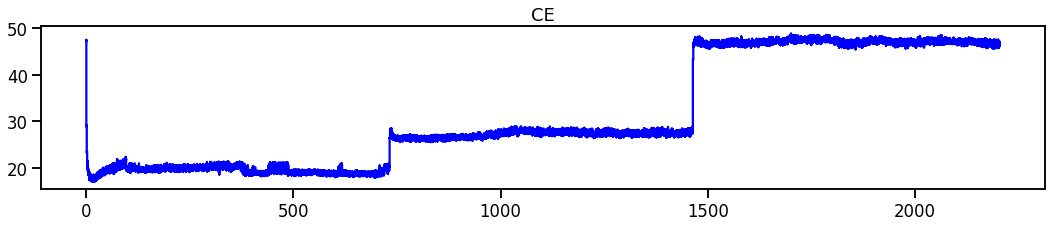

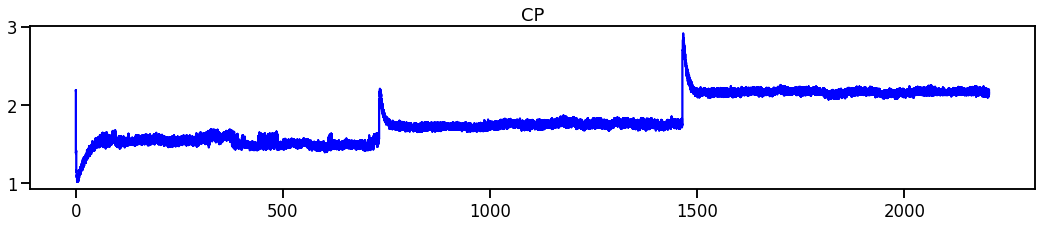

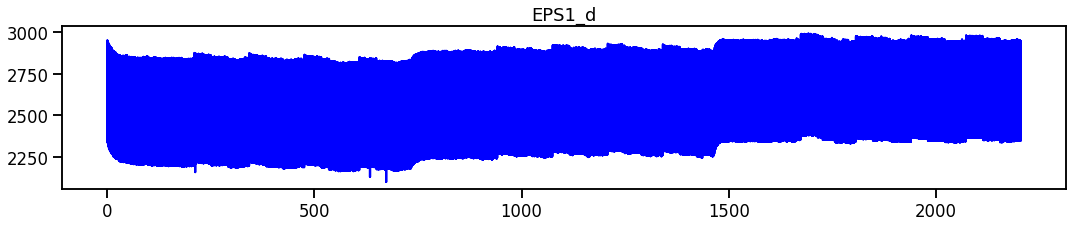

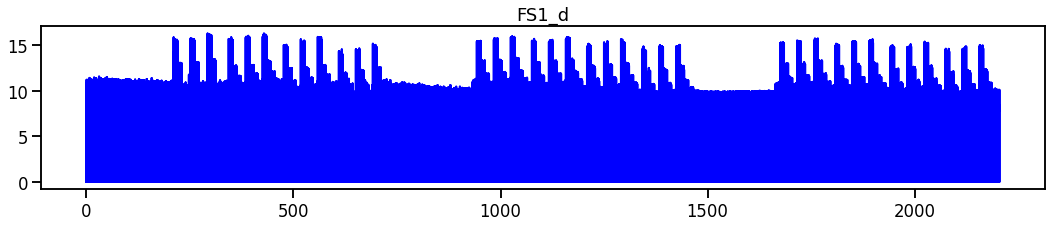

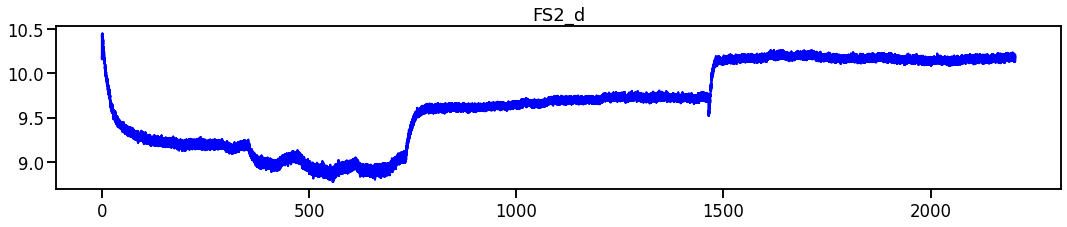

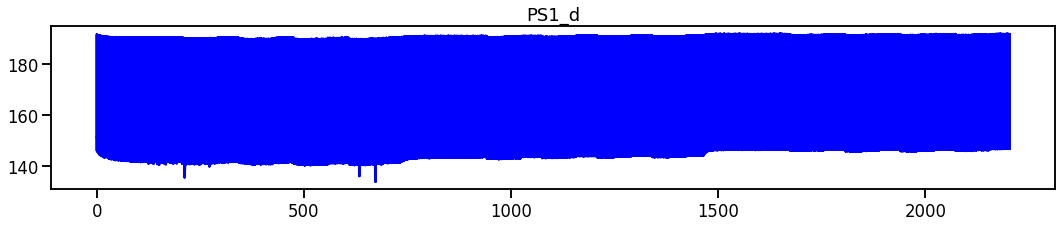

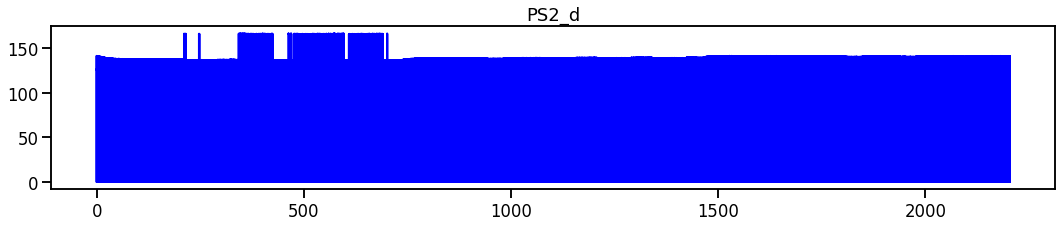

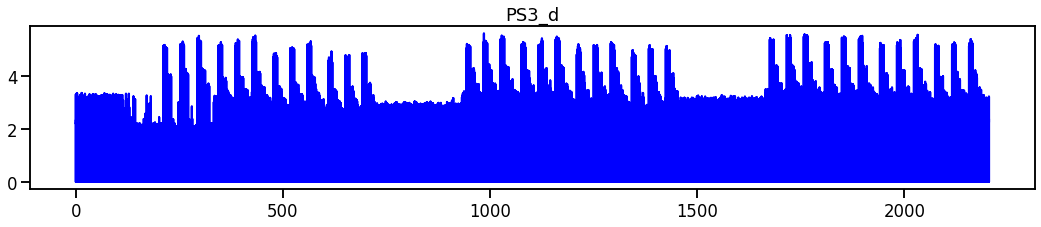

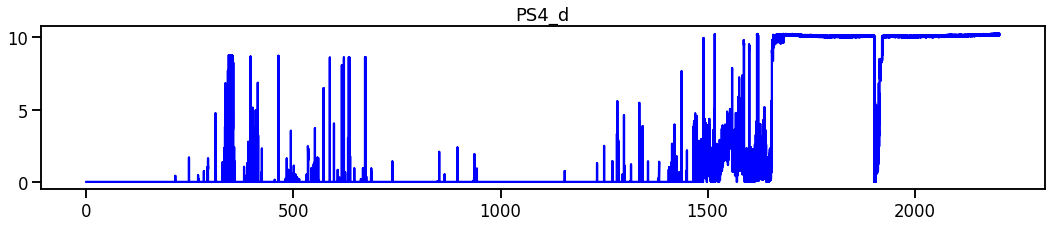

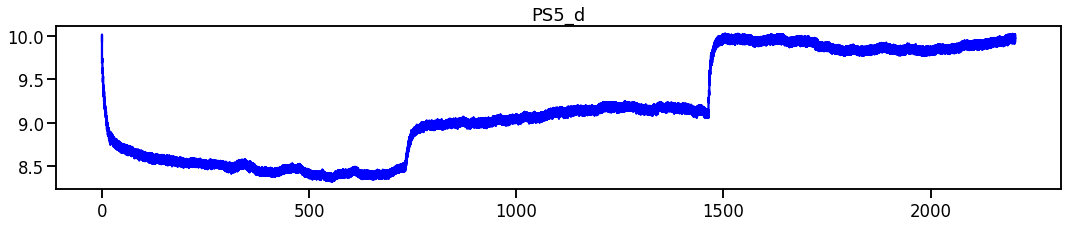

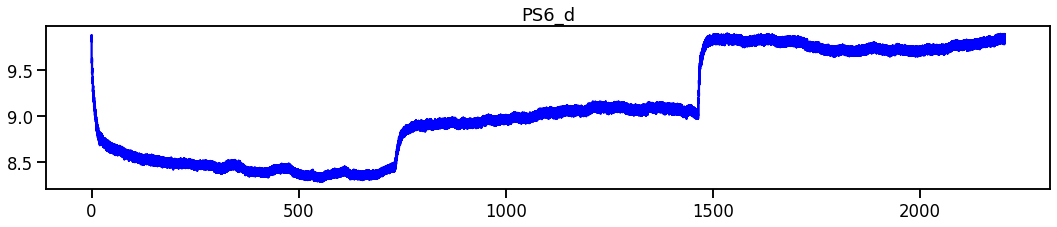

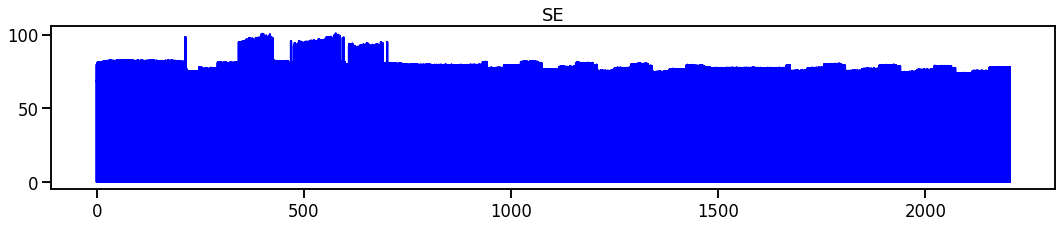

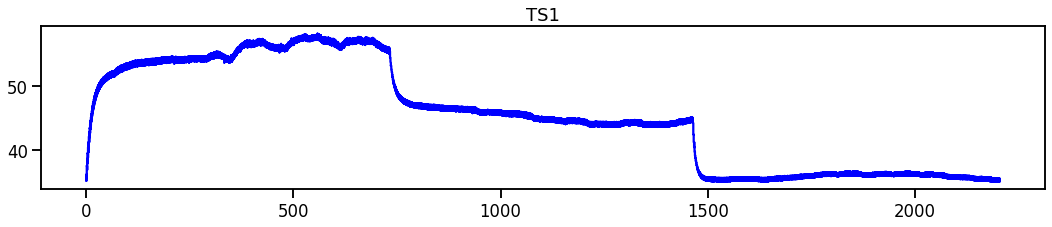

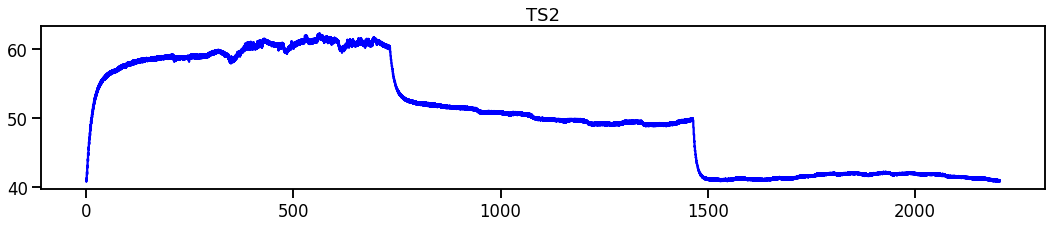

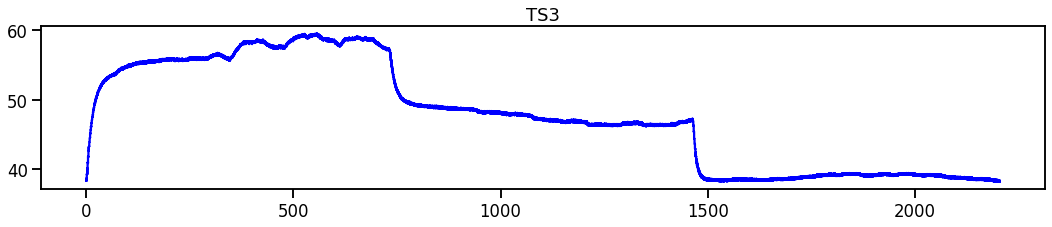

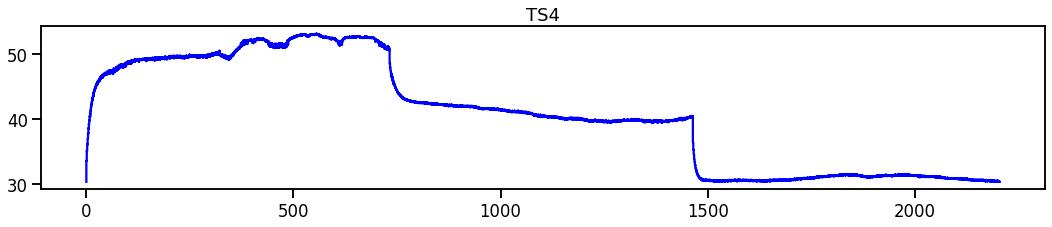

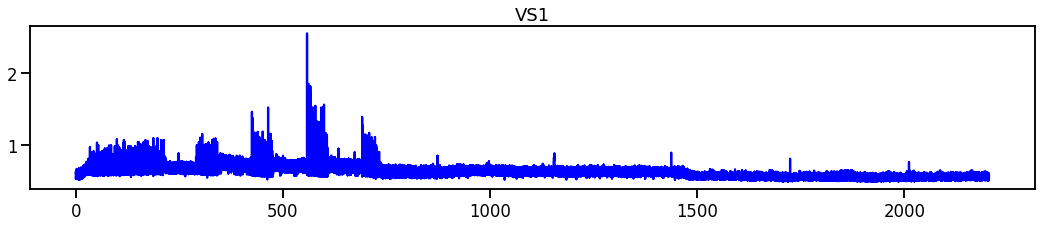

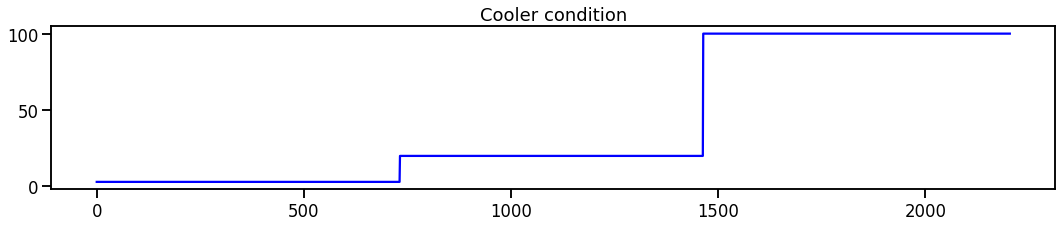

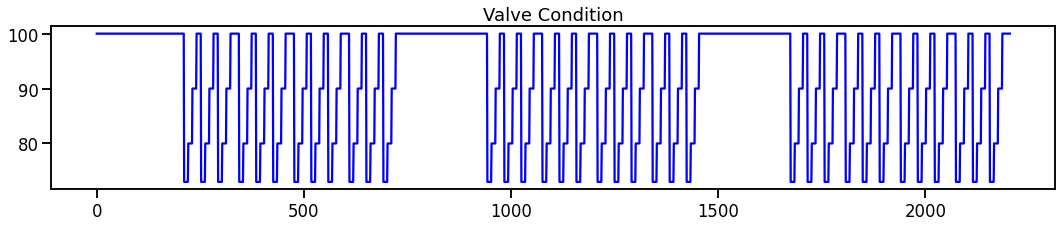

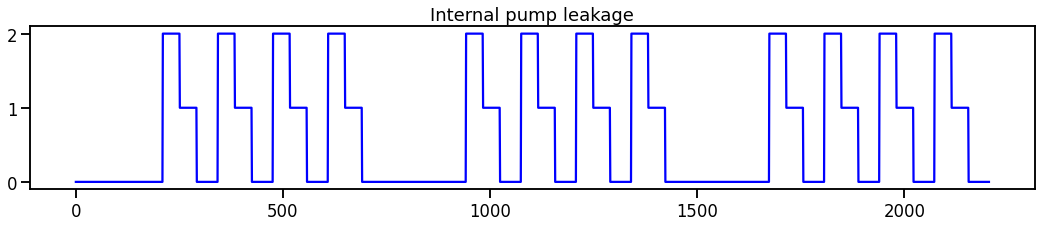

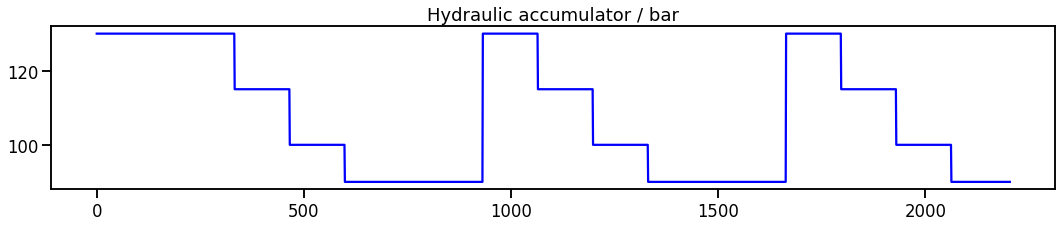

In [57]:
import warnings
stable = full_df[full_df['stable flag']=='0']
df2 = full_df.drop(['stable flag'], axis=1)
names=df2.columns
for name in names:
    sns.set_context('talk')
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(optimal[name], linestyle='none', marker='X', color='red', markersize=12)
    _ = plt.plot(full_df[name], color='blue')
    _ = plt.title(name)
    plt.show()

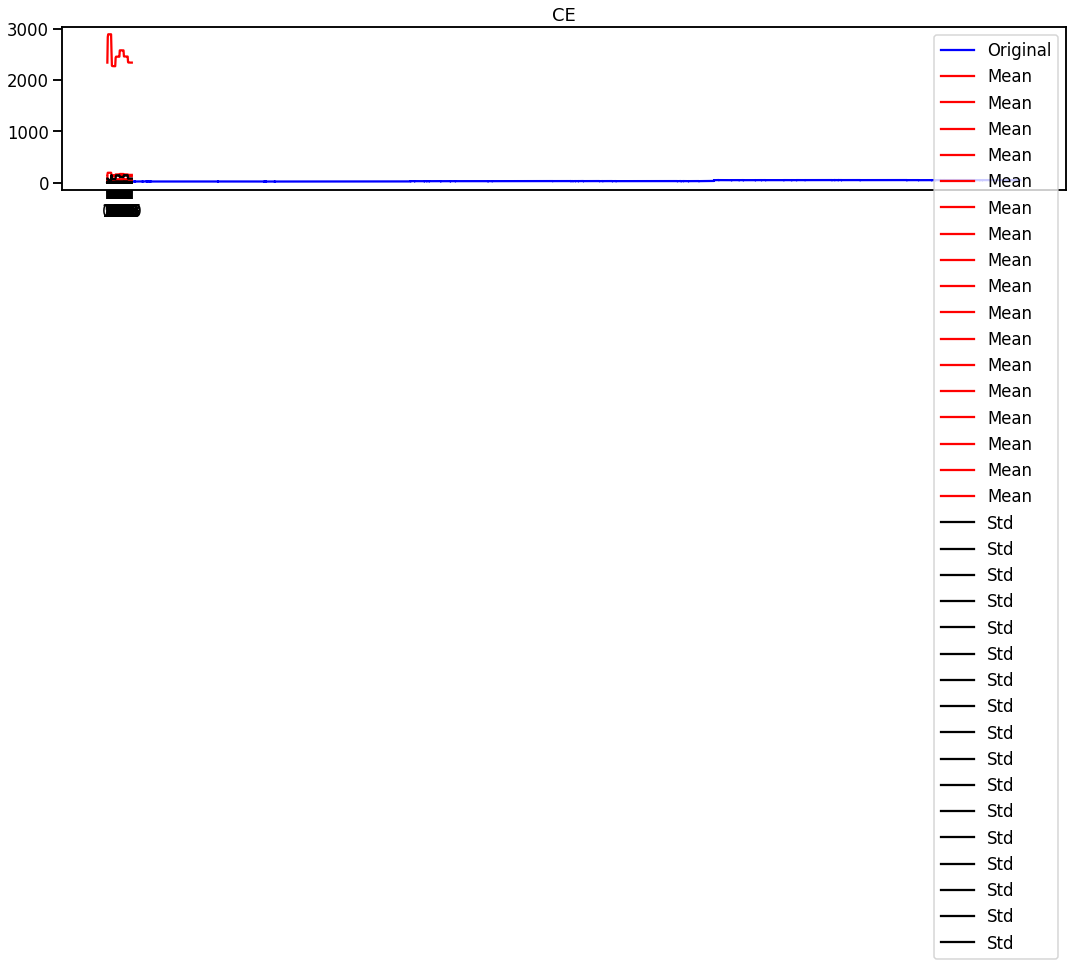

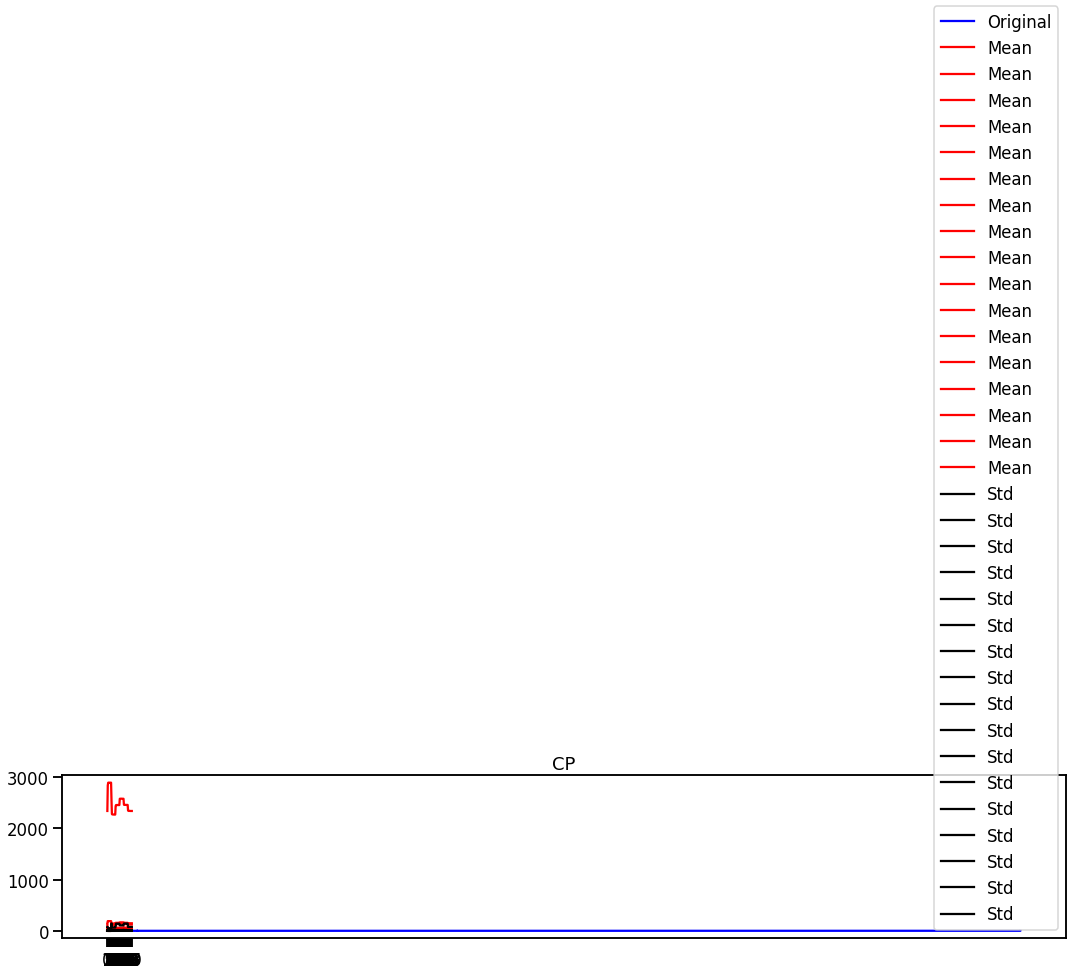

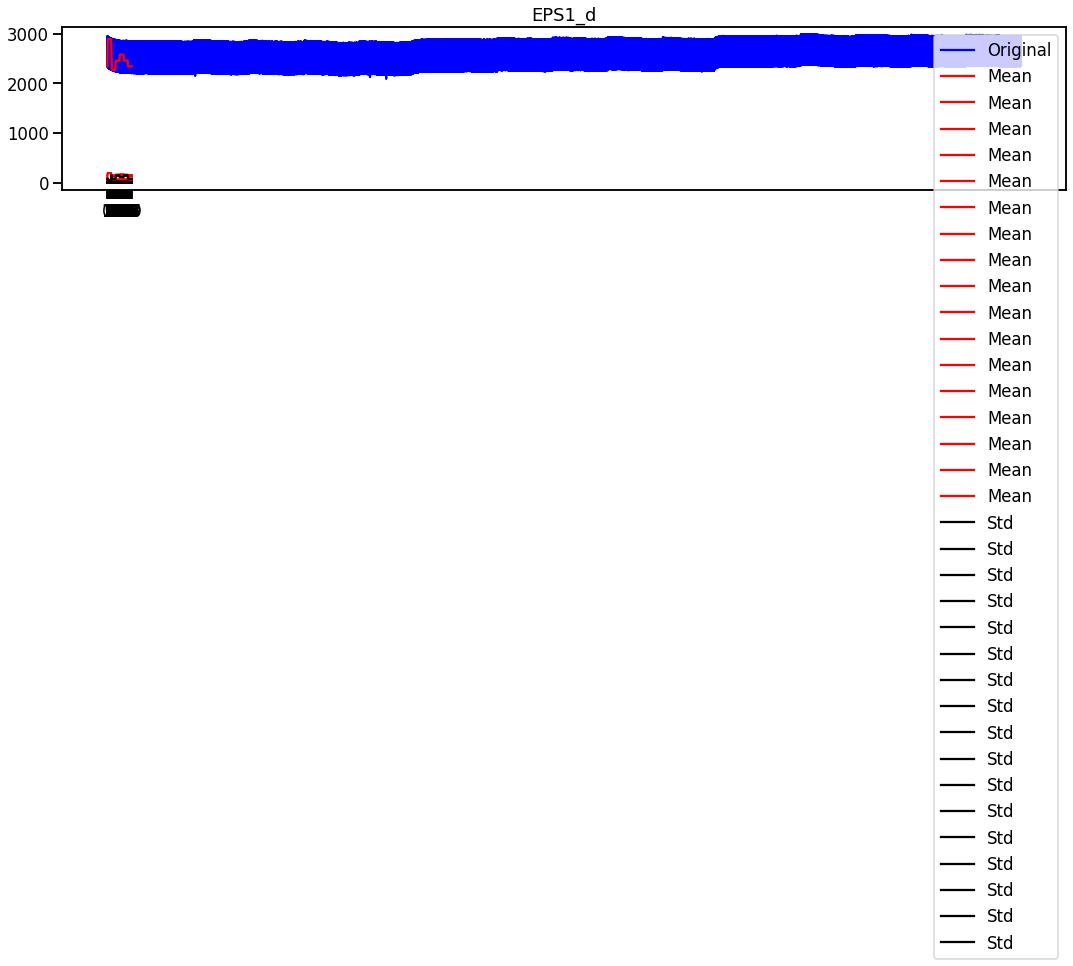

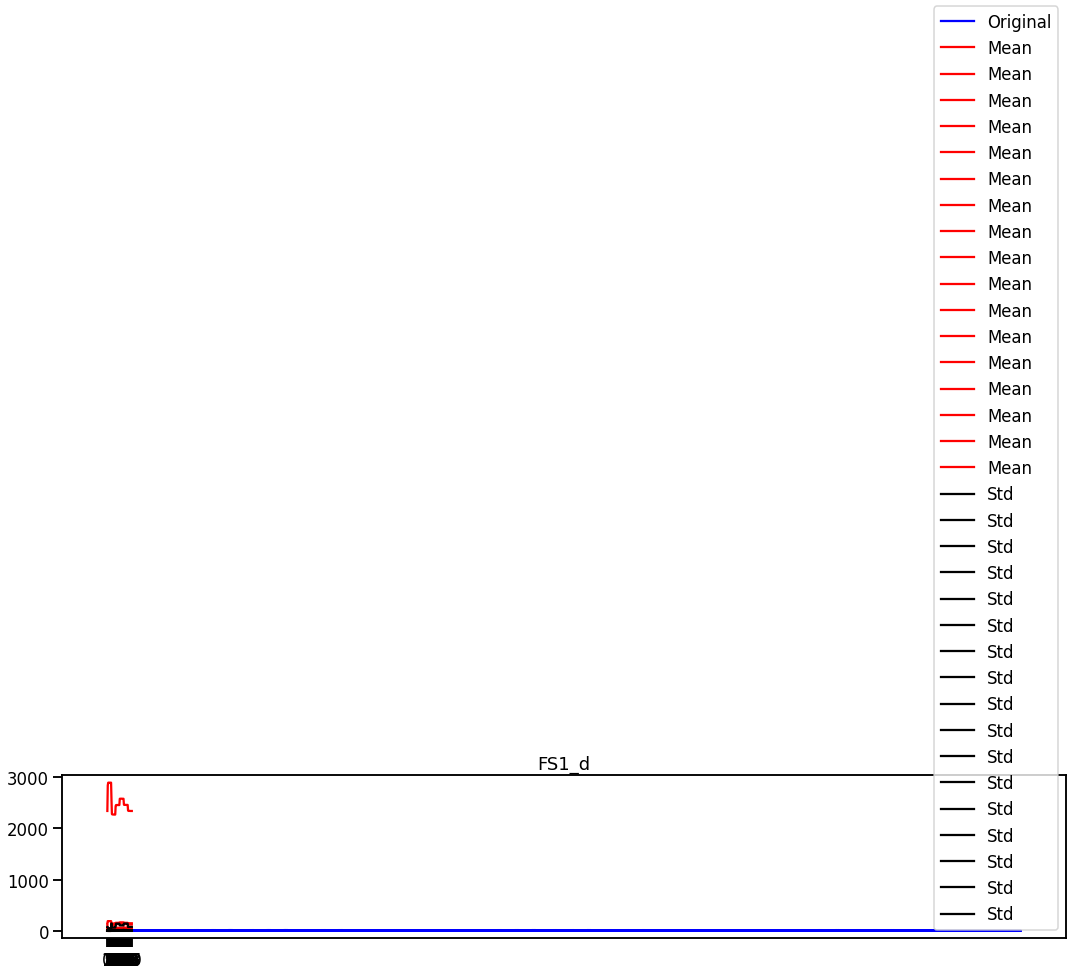

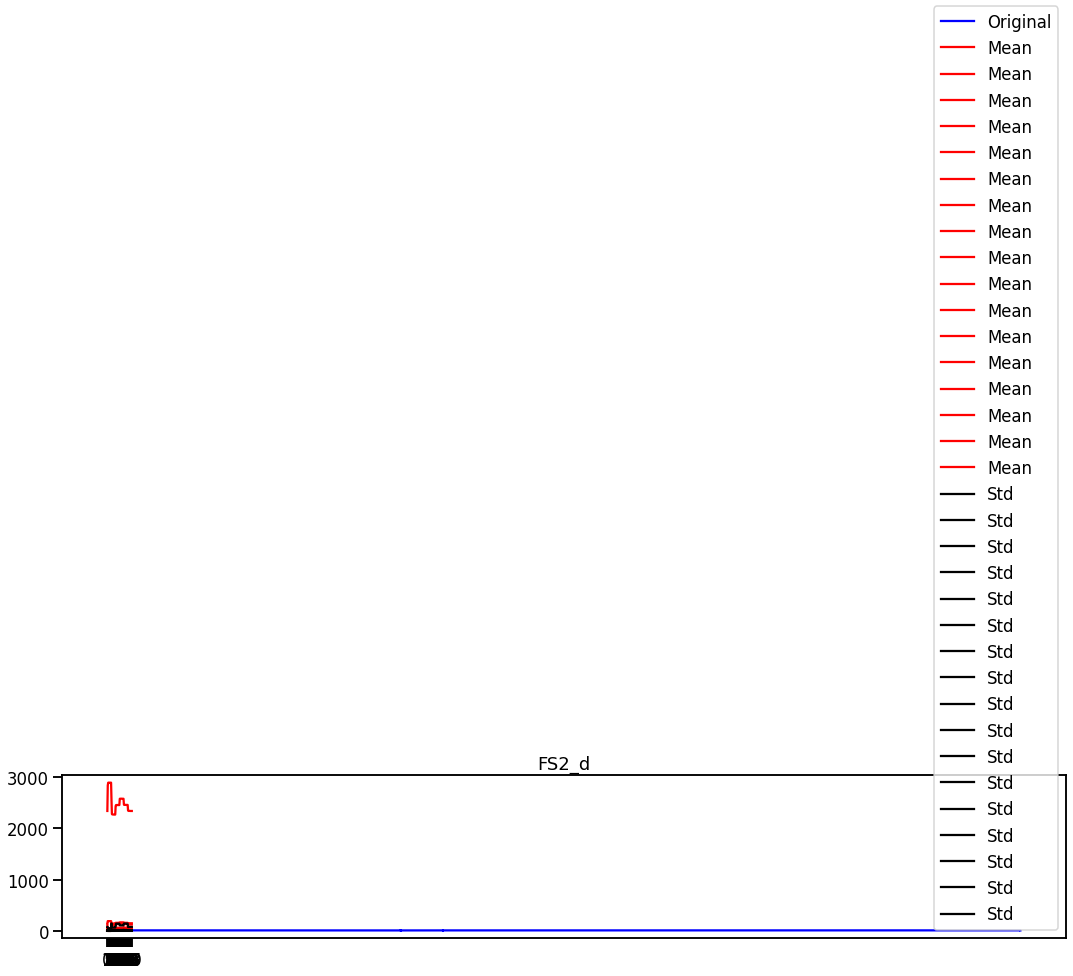

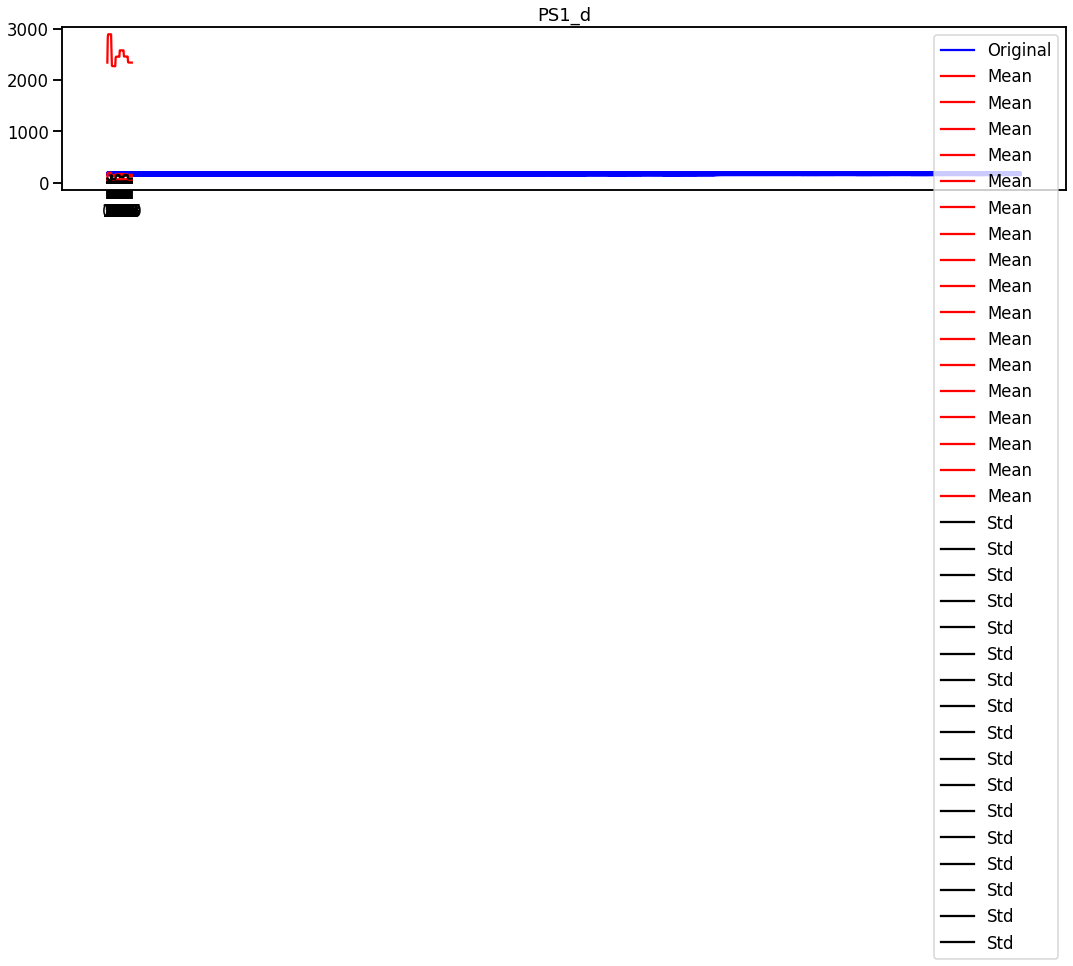

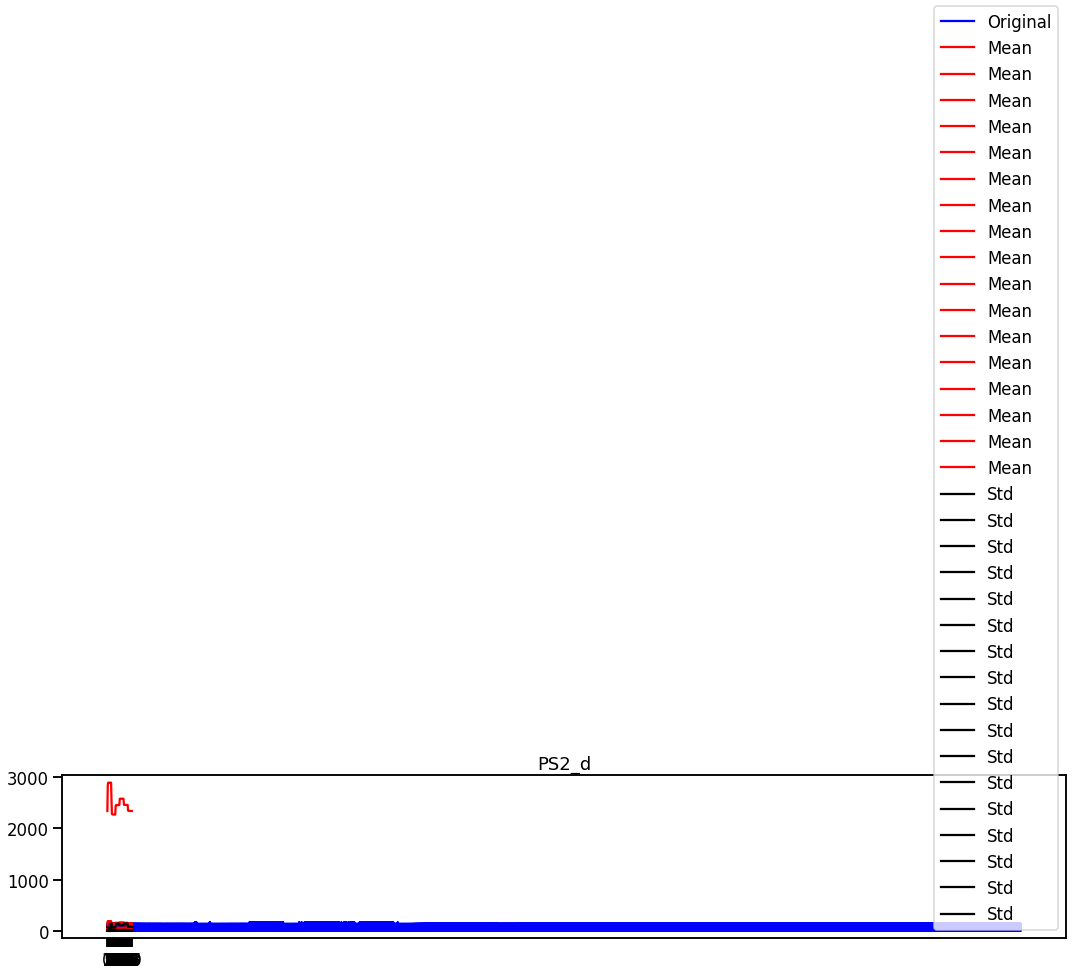

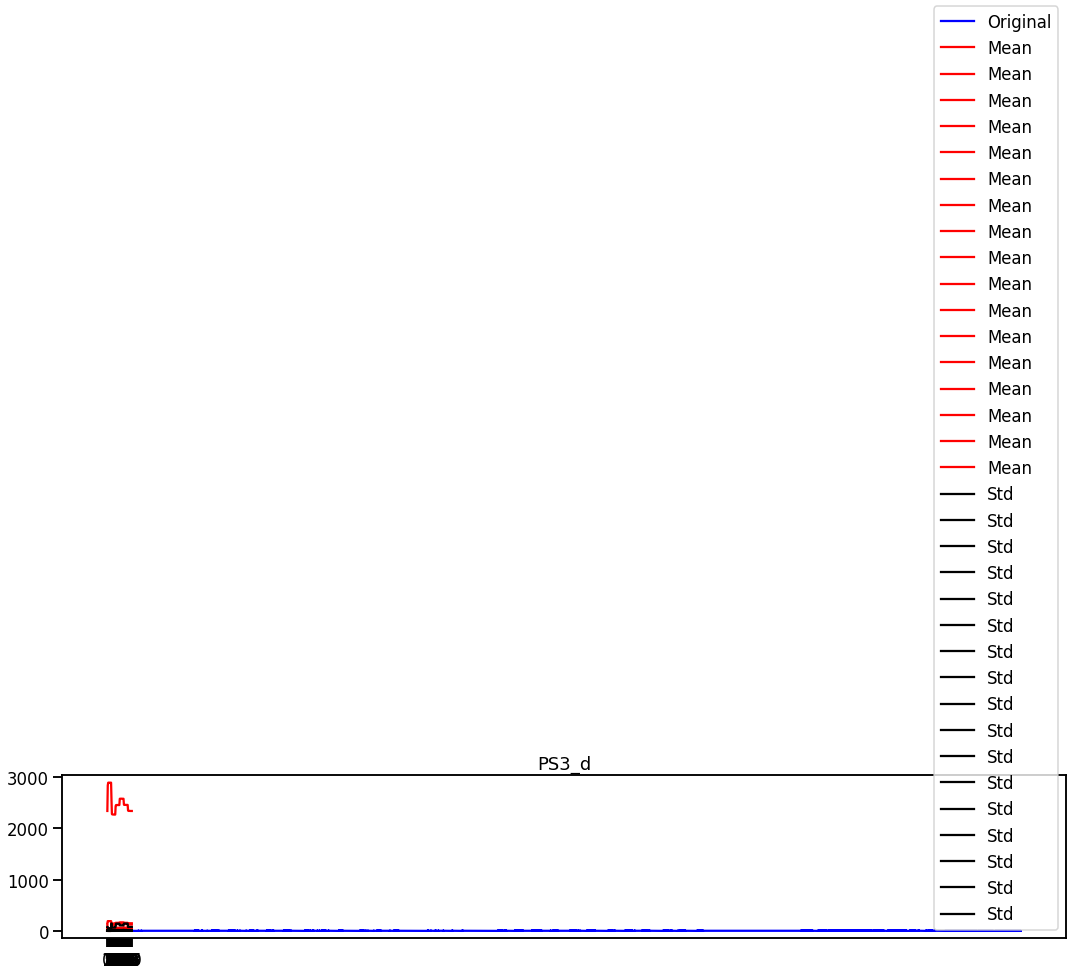

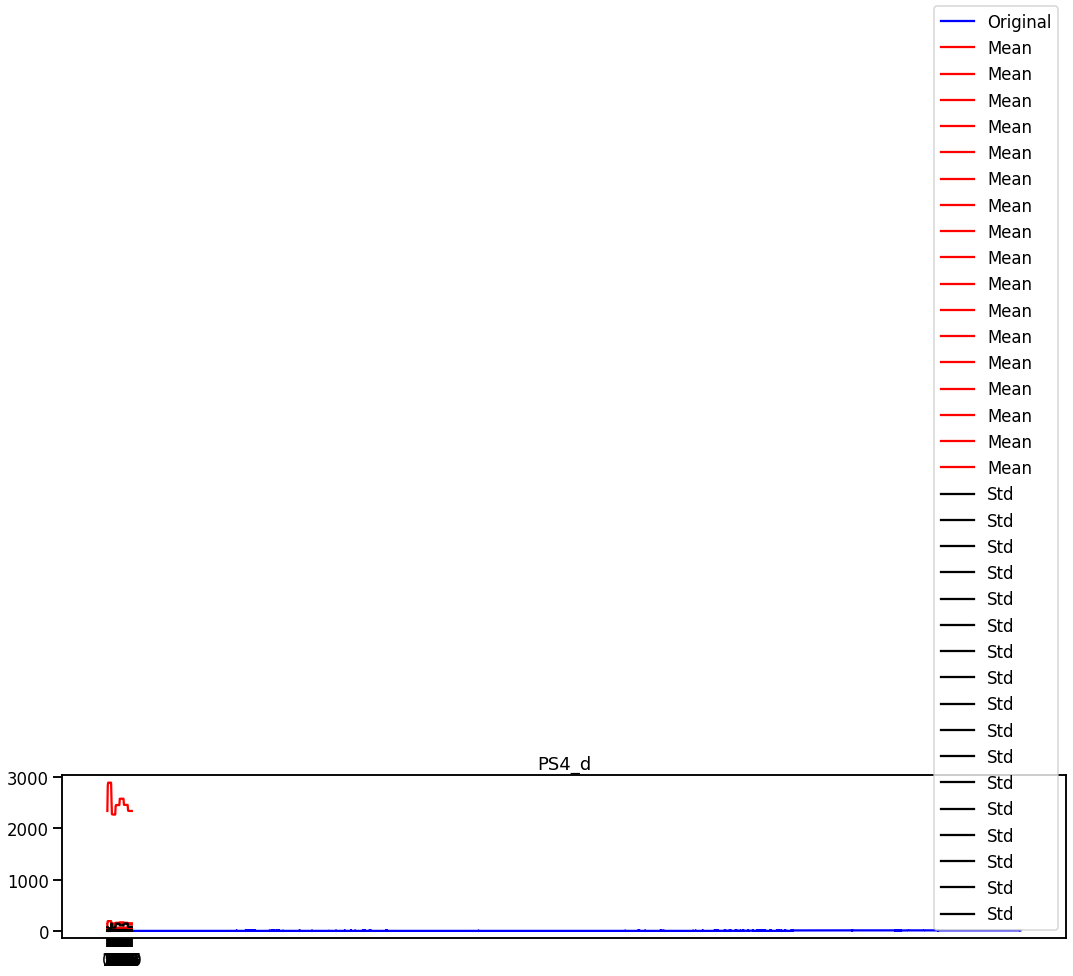

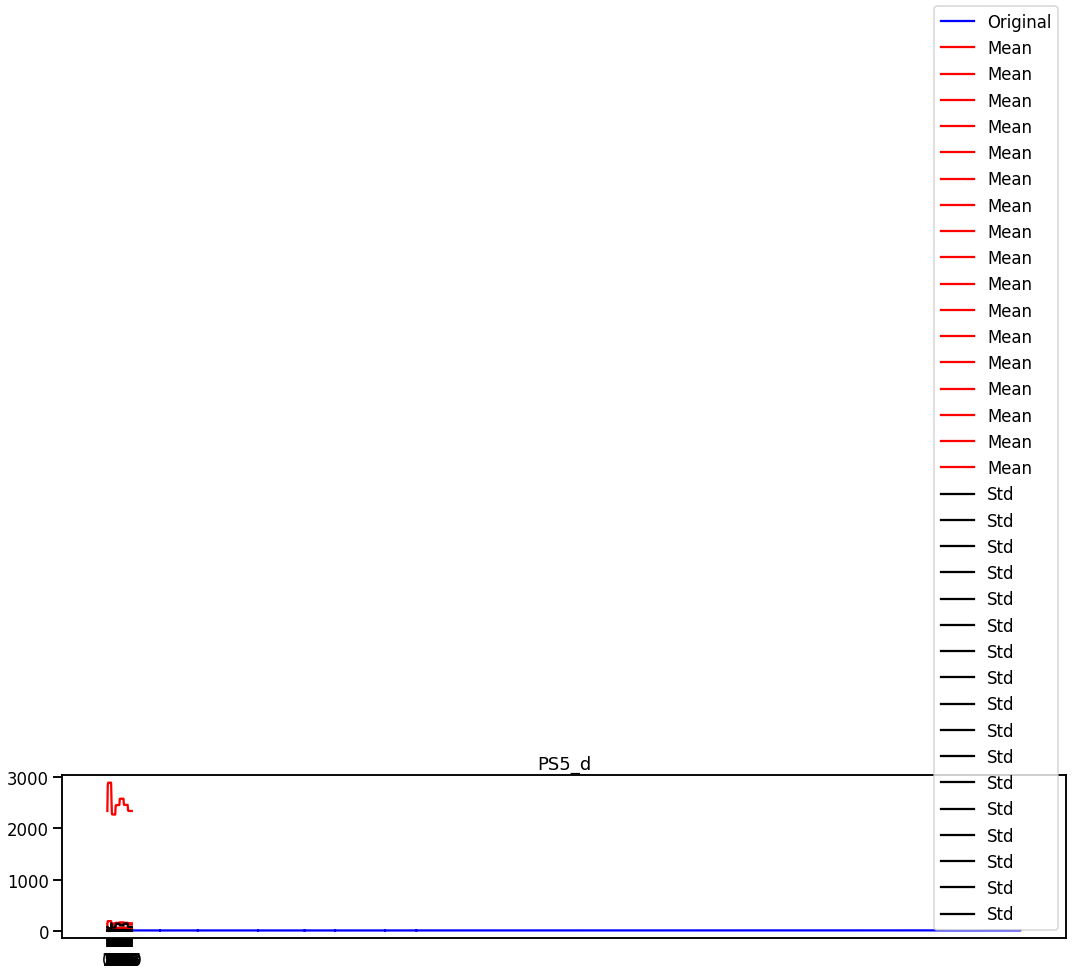

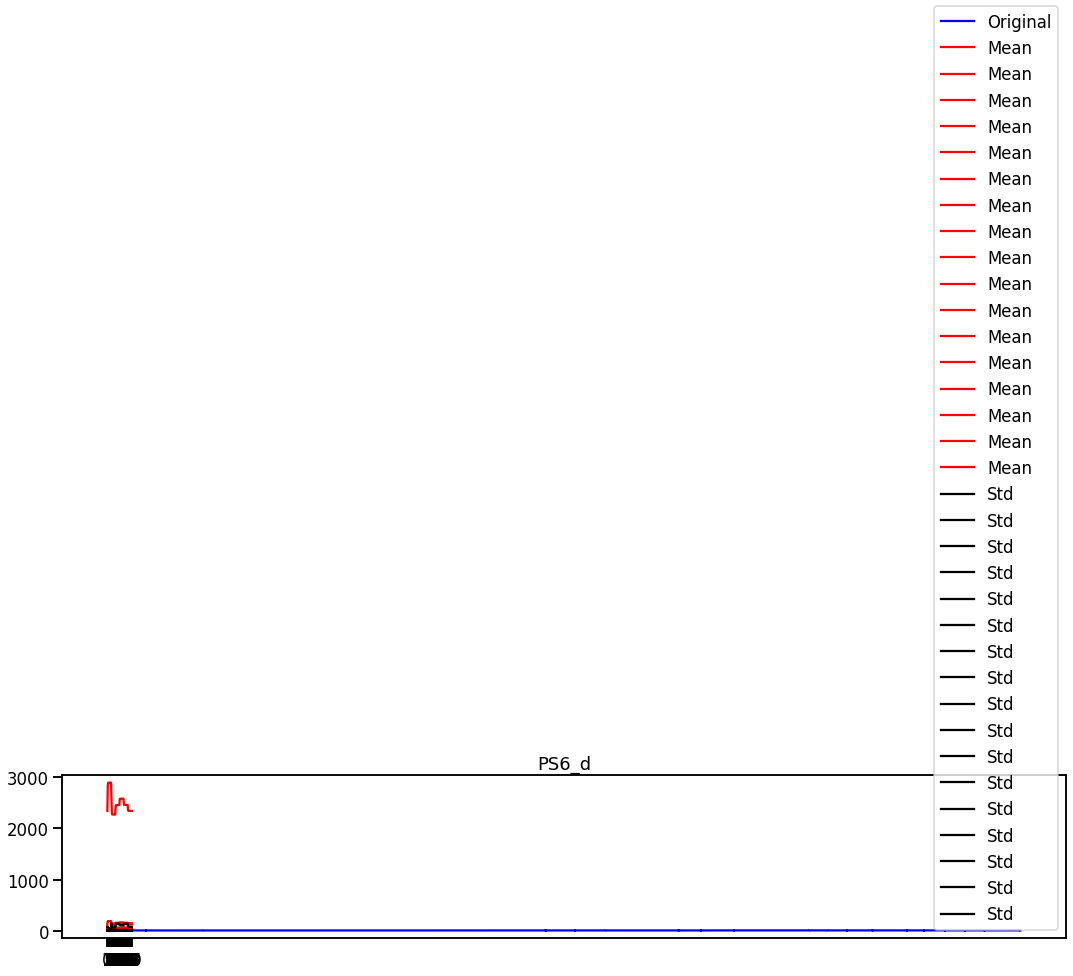

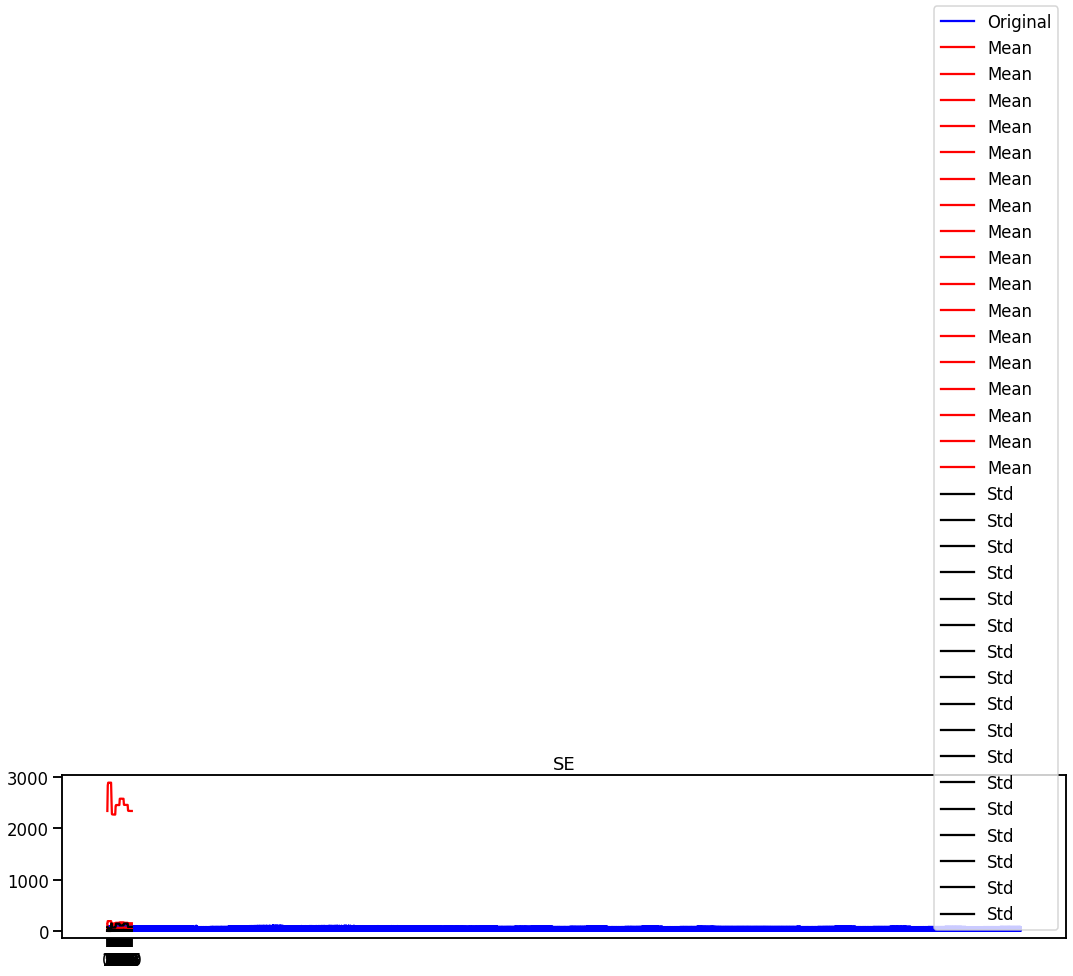

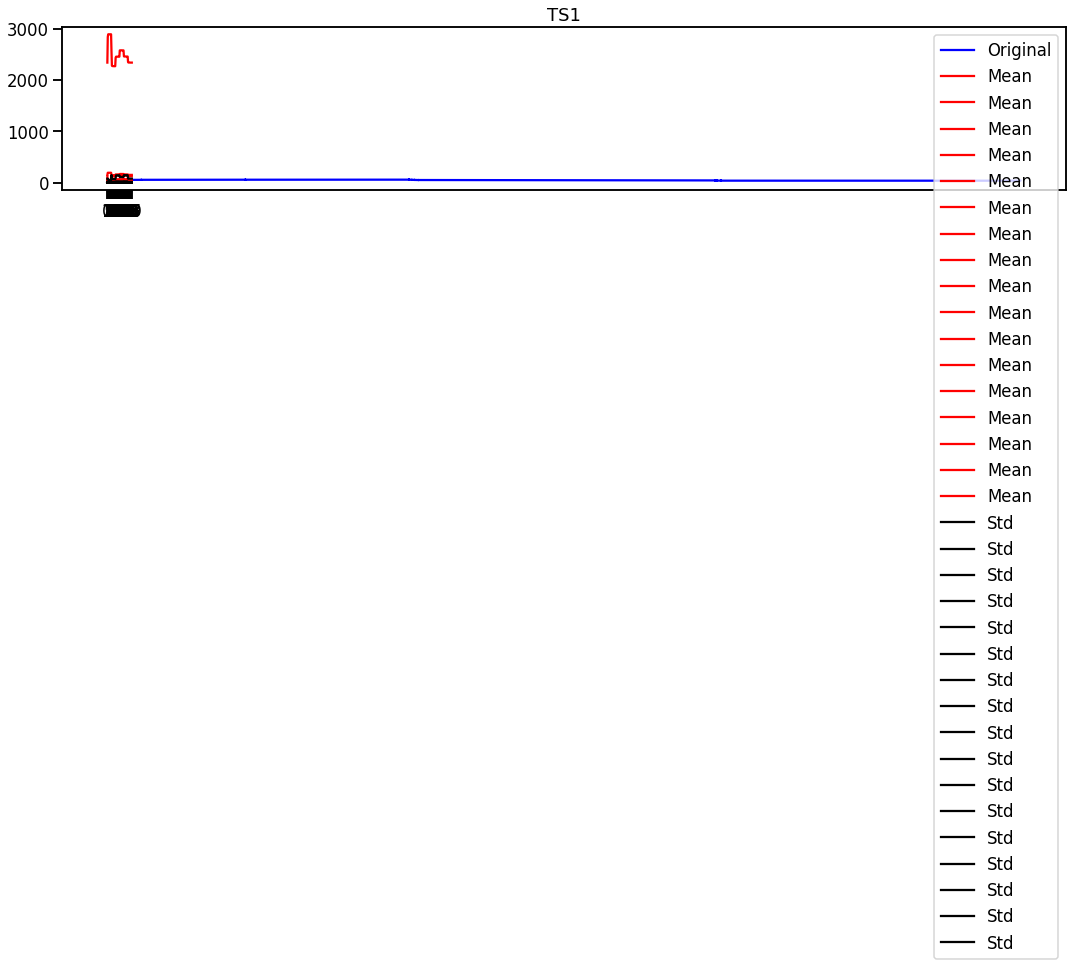

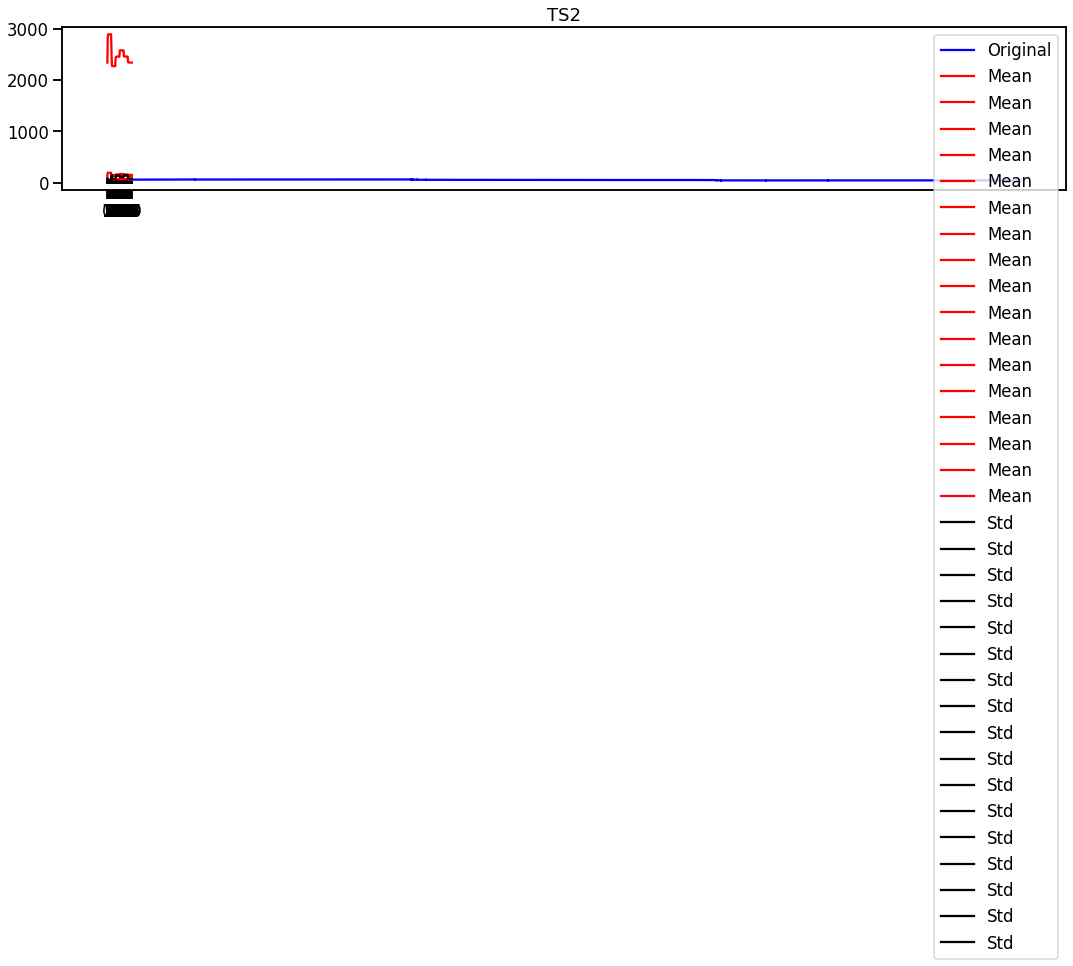

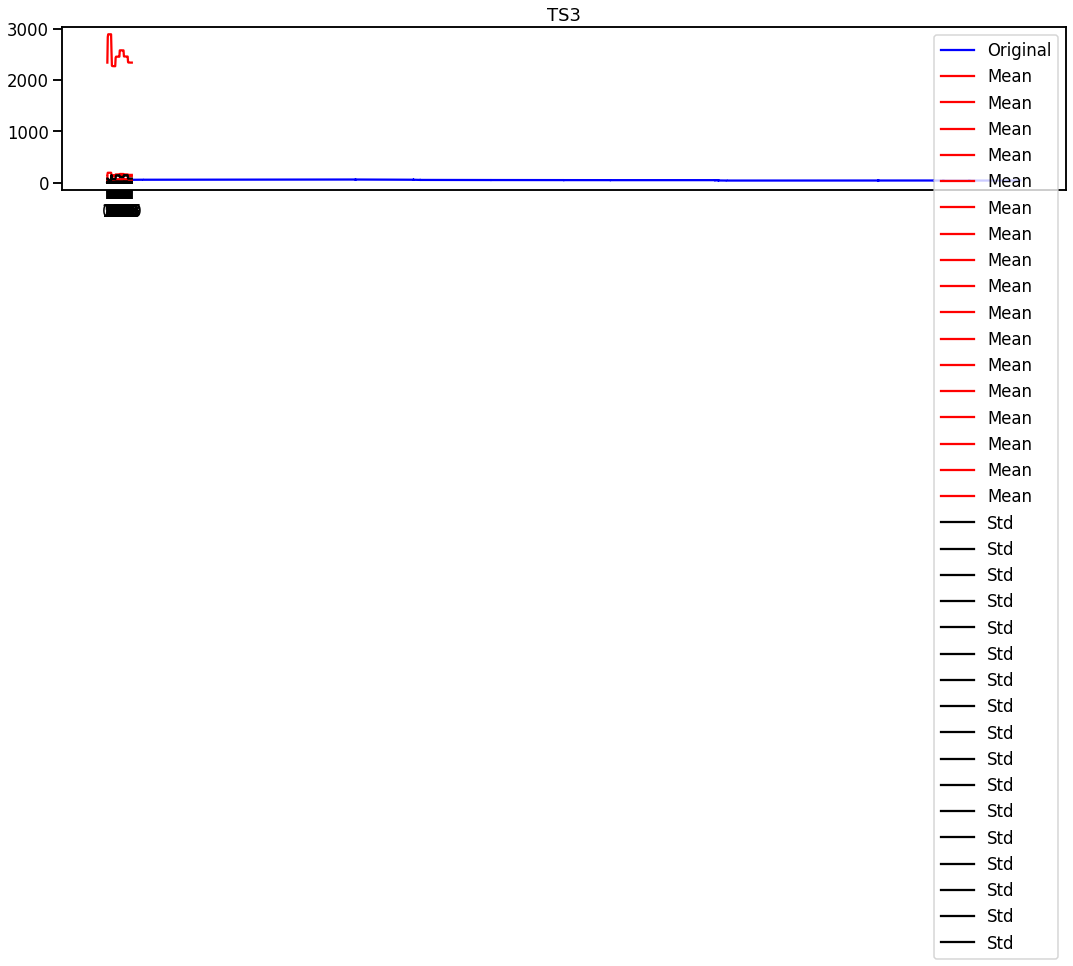

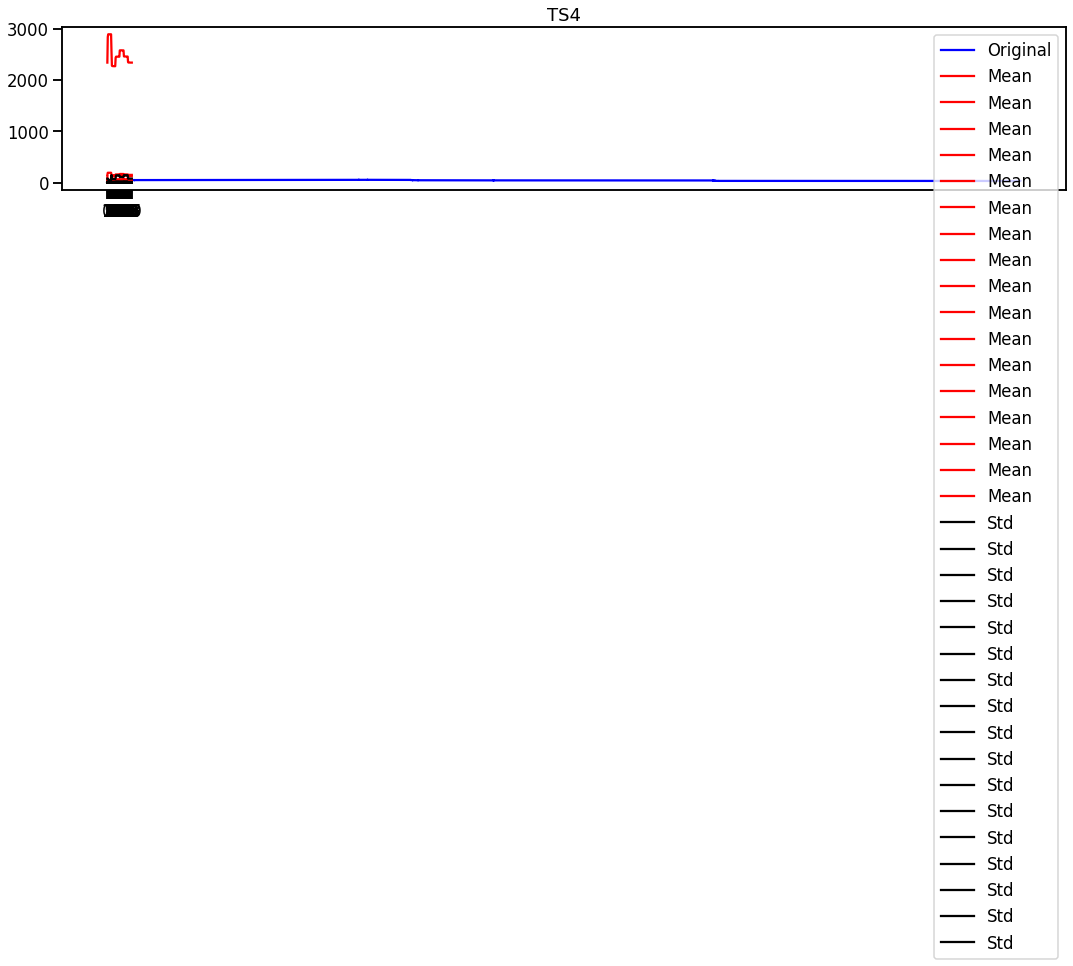

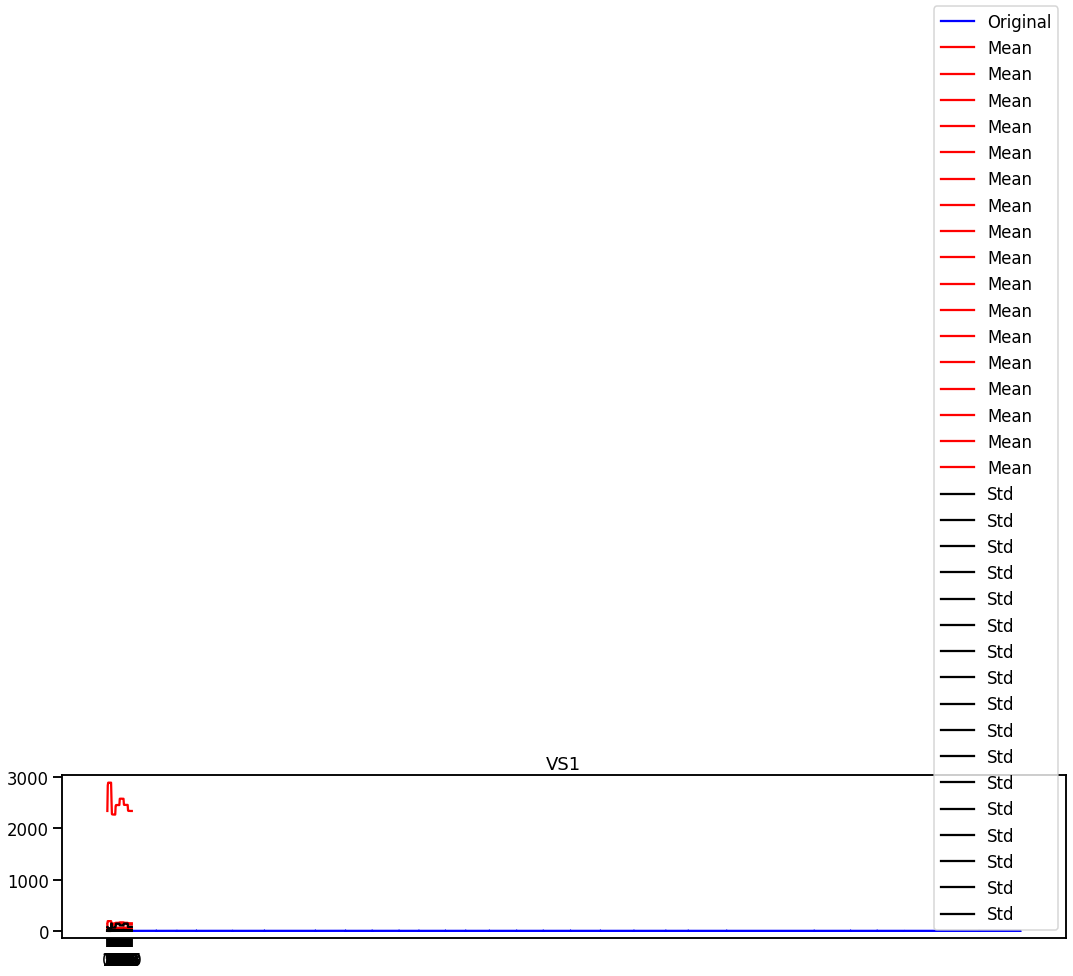

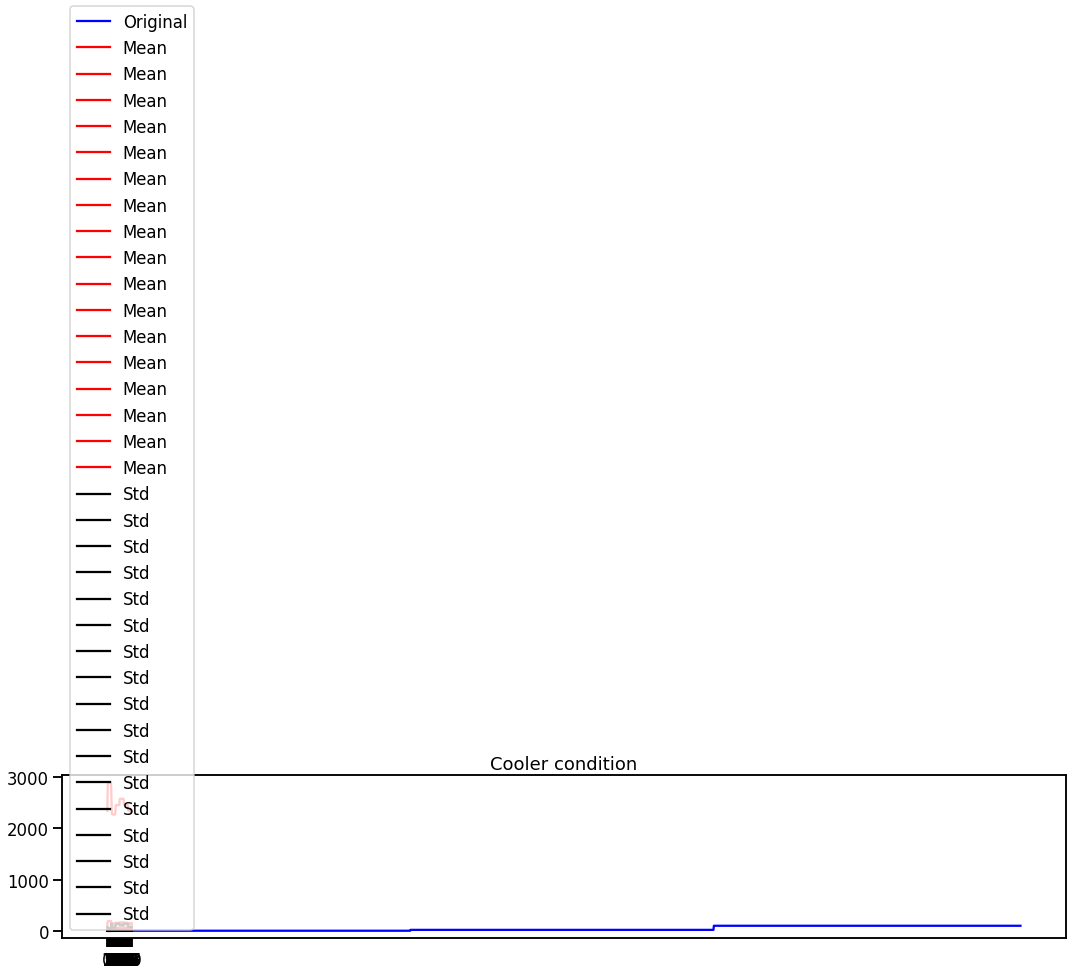

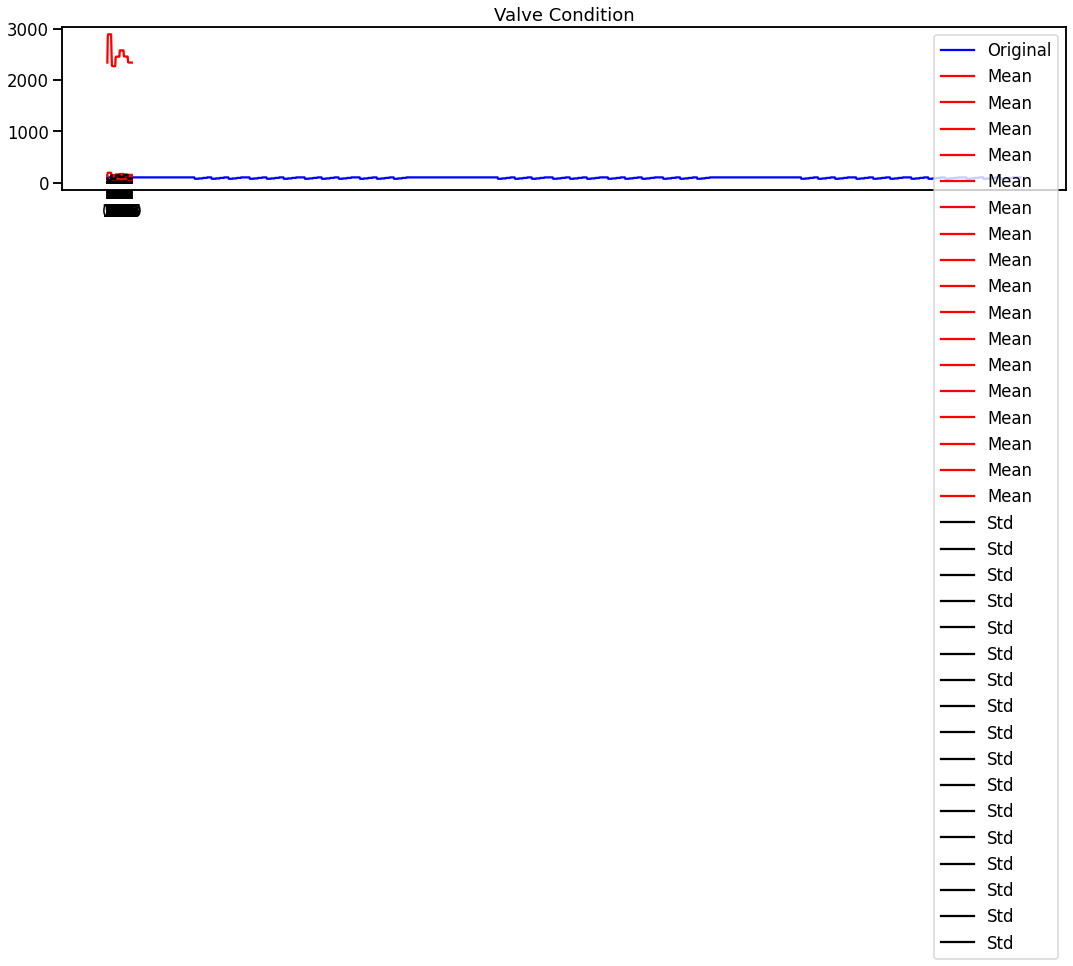

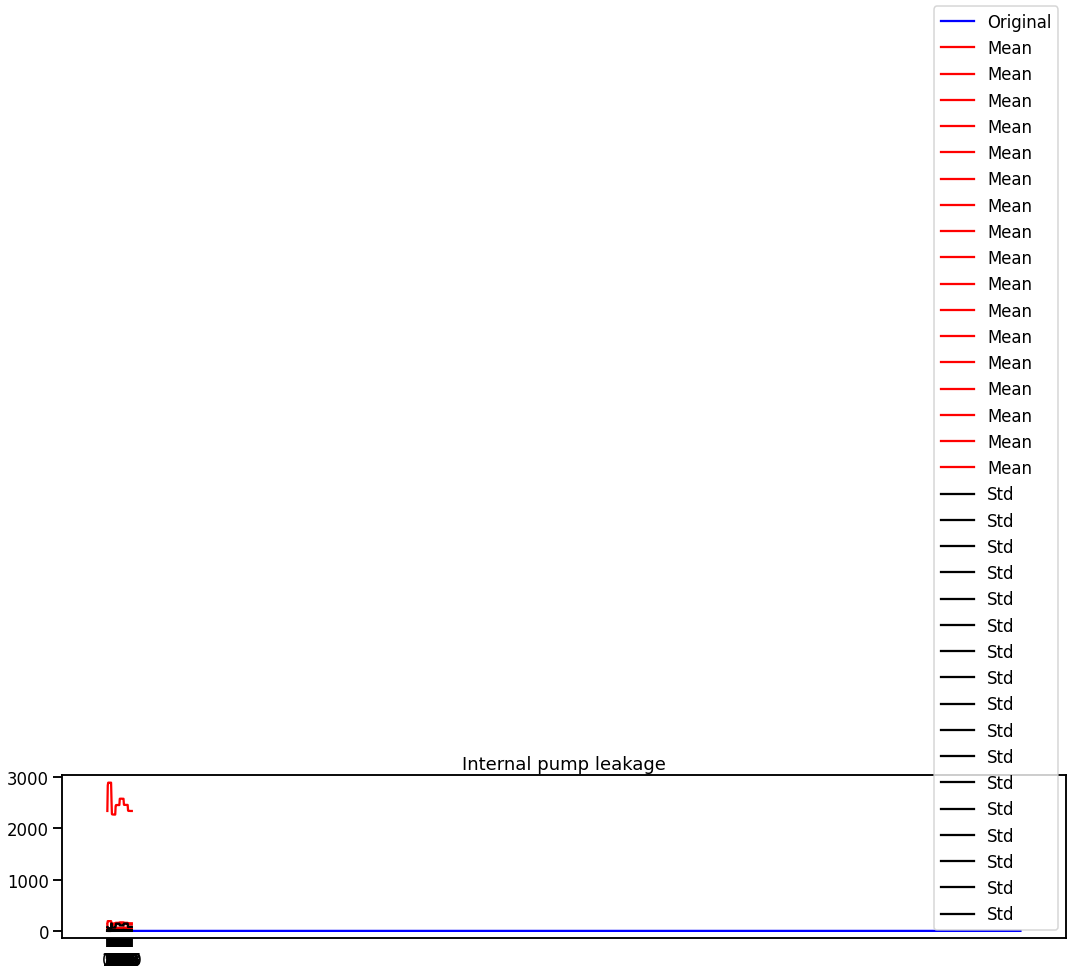

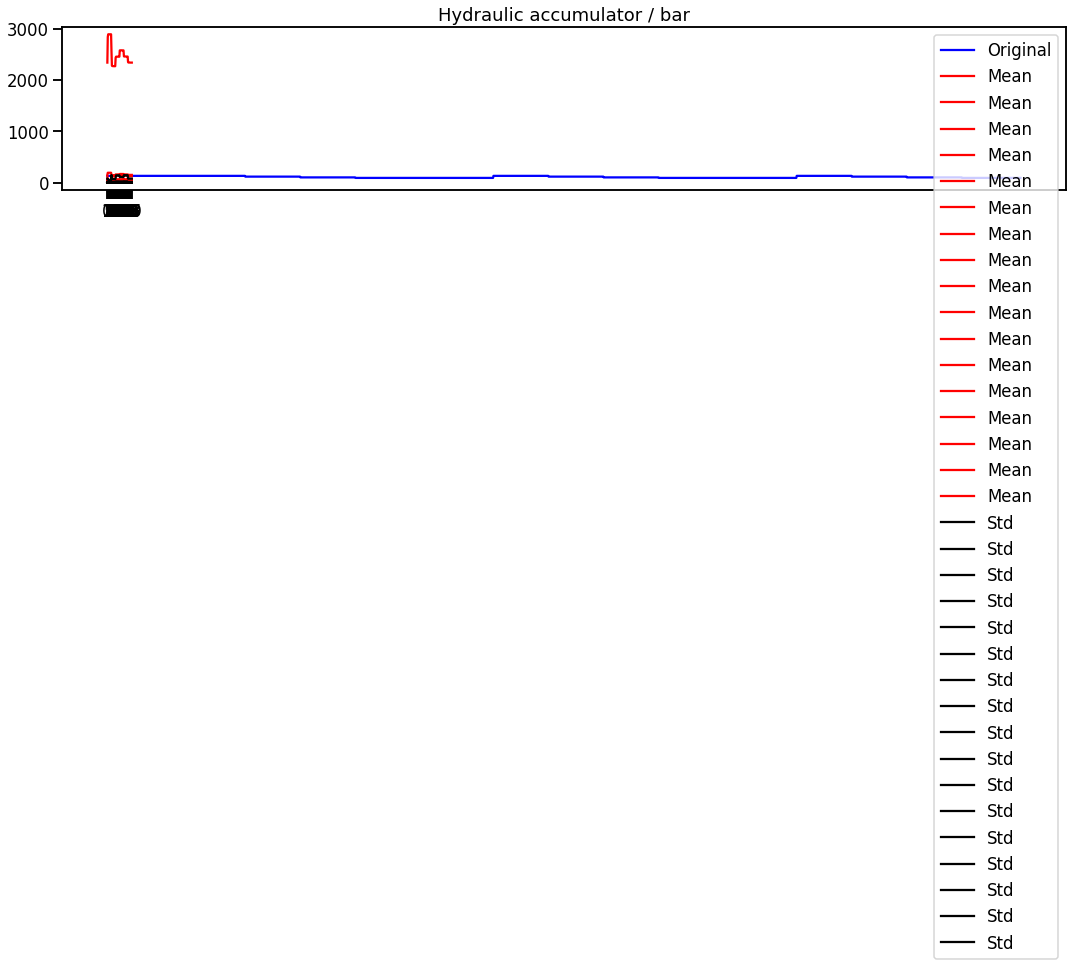

In [41]:
for name in names:
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(full_df[name], color='blue', label='Original')
    _ = plt.plot(means, color='red', label='Mean')
    _ = plt.plot(stds, color='black', label='Std' )
    _ = plt.legend(loc='best')
    _ = plt.title(name)
    plt.show()

In [42]:
import warnings
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
x=full_df.drop(['Cooler condition', 'Valve Condition', 'Internal pump leakage', 'Hydraulic accumulator / bar', 'stable flag'],1)
y=full_df['Valve Condition']
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
bestfeatures = SelectKBest(score_func=chi2, k=3)
fit = bestfeatures.fit(x_scaled, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(3, 'Score'))

   Feature        Score
8    PS4_d  2329.457593
11      SE   115.964087
2   EPS1_d    82.938121


In [43]:
full_df.describe()

,CE,CP,EPS1_d,FS1_d,FS2_d,PS1_d,PS2_d,PS3_d,PS4_d,PS5_d,PS6_d,SE,TS1,TS2,TS3,TS4,VS1,Cooler condition,Valve Condition,Internal pump leakage,Hydraulic accumulator / bar,stable flag
count,132300.000000,132300.000000,132300.000000,132300.000000,132300.000000,132300.000000,132300.000000,132300.000000,132300.000000,132300.000000,132300.000000,132300.000000,132300.000000,132300.000000,132300.000000,132300.000000,132300.000000,132300.000000,132300.000000,132300.000000,132300.000000,132300.000000
mean,31.299077,1.808399,2495.538600,6.222077,9.649487,160.346300,110.048369,1.754645,2.601402,9.163337,9.079413,55.287900,45.424567,50.365979,47.662121,40.735654,0.613315,41.240816,90.693878,0.669388,107.199546,0.342857
std,11.577950,0.279327,218.138327,3.107048,0.449472,16.243661,47.400902,0.841890,4.297899,0.576614,0.549932,25.642281,7.992565,7.395624,7.450604,8.106355,0.080461,42.373691,10.679420,0.817050,16.432183,0.474666
min,17.042000,1.016000,2099.200000,0.000000,8.773000,133.770000,0.000000,0.000000,0.000000,8.318000,8.278000,0.000000,34.984000,40.707000,38.145000,30.355000,0.483000,3.000000,73.000000,0.000000,90.000000,0.000000
25%,20.131750,1.555000,2338.000000,7.319000,9.211000,148.740000,118.810000,1.898000,0.000000,8.554000,8.495000,59.042000,36.246000,41.895000,39.160000,31.273000,0.561000,3.000000,80.000000,0.000000,90.000000,0.000000
50%,27.303000,1.738000,2425.100000,7.646000,9.688000,153.760000,125.650000,2.047000,0.000000,9.108000,9.023000,67.064000,44.859000,49.805000,47.090000,40.437000,0.599000,20.000000,100.000000,0.000000,100.000000,0.000000
75%,46.625000,2.139000,2615.800000,7.804000,10.152000,165.480000,130.380000,2.219000,4.029250,9.847000,9.731000,69.393000,54.043000,58.543000,55.668000,49.375000,0.641000,100.000000,100.000000,1.000000,130.000000,1.000000
max,48.777000,2.909000,2991.000000,16.244000,10.447000,191.820000,165.900000,5.602000,10.255000,10.022000,9.900000,100.600000,58.207000,62.176000,59.539000,53.145000,2.546000,100.000000,100.000000,2.000000,130.000000,1.000000


In [44]:
full_df.value_counts

<bound method DataFrame.value_counts of               CE     CP  ...  Hydraulic accumulator / bar  stable flag
Cycle ID                 ...                                          
0         47.202  2.184  ...                          130            1
0         47.273  2.184  ...                          130            1
0         47.250  2.184  ...                          130            1
0         47.332  2.185  ...                          130            1
0         47.213  2.178  ...                          130            1
...          ...    ...  ...                          ...          ...
2204      46.355  2.134  ...                           90            0
2204      46.432  2.146  ...                           90            0
2204      46.384  2.144  ...                           90            0
2204      46.479  2.136  ...                           90            0
2204      46.621  2.148  ...                           90            0

[132300 rows x 22 columns]>

In [45]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(full_df.values)
labels = kmeans.predict(full_df.values)
unique_elements, counts_elements = np.unique(labels, return_counts=True)
clusters = np.asarray((unique_elements, counts_elements))

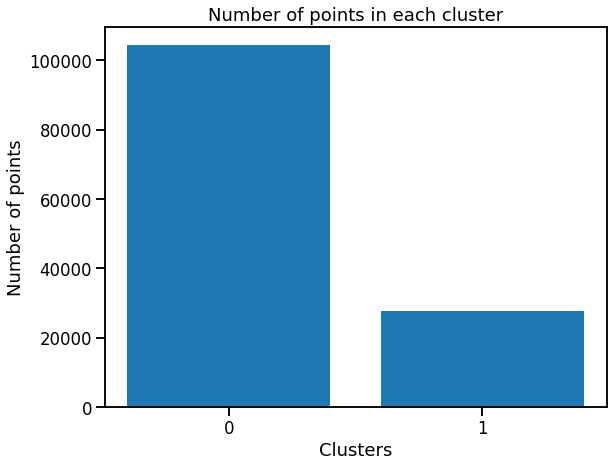

In [46]:
_ = plt.figure(figsize = (9, 7))
_ = plt.bar(clusters[0], clusters[1], tick_label=clusters[0])
_ = plt.xlabel('Clusters')
_ = plt.ylabel('Number of points')
_ = plt.title('Number of points in each cluster')
plt.show()

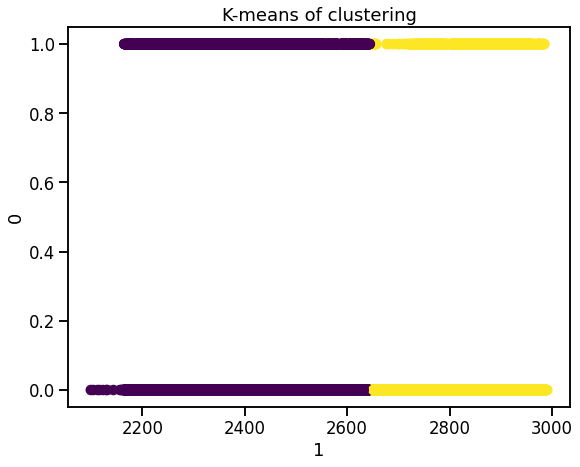

In [47]:
_ = plt.figure(figsize=(9,7))
_ = plt.scatter(full_df['EPS1_d'], full_df['stable flag'] , c=labels)
_ = plt.xlabel('1')
_ = plt.ylabel('0')
_ = plt.title('K-means of clustering')
plt.show()